In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CAD_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222650, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,1.29842,1.29845,1.29842,1.29849
2020-01-01 17:05:00,1.29846,1.29857,1.29777,1.29858
2020-01-01 17:10:00,1.29857,1.29803,1.29802,1.29863
2020-01-01 17:15:00,1.29845,1.29800,1.29799,1.29845
2020-01-01 17:20:00,1.29799,1.29816,1.29798,1.29817


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222649, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,1.29842,1.29845,1.29842,1.29849,1.29857,17,2,1,-0.00003,1.298455,0.00007,1.298445
2020-01-01 17:05:00,1.29846,1.29857,1.29777,1.29858,1.29803,17,2,1,-0.00011,1.298175,0.00081,1.298345
2020-01-01 17:10:00,1.29857,1.29803,1.29802,1.29863,1.29800,17,2,1,0.00054,1.298325,0.00061,1.298312
2020-01-01 17:15:00,1.29845,1.29800,1.29799,1.29845,1.29816,17,2,1,0.00045,1.298220,0.00046,1.298223
2020-01-01 17:20:00,1.29799,1.29816,1.29798,1.29817,1.29816,17,2,1,-0.00017,1.298075,0.00019,1.298075


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,1.29842,1.29845,1.29842,1.29849,1.29857,17,2,1,-0.00003,1.298455,0.00007,1.298445,-25.512247
2020-01-01 17:05:00,1.29846,1.29857,1.29777,1.29858,1.29803,17,2,1,-0.00011,1.298175,0.00081,1.298345,-25.512396
2020-01-01 17:10:00,1.29857,1.29803,1.29802,1.29863,1.29800,17,2,1,0.00054,1.298325,0.00061,1.298312,-25.512396
2020-01-01 17:15:00,1.29845,1.29800,1.29799,1.29845,1.29816,17,2,1,0.00045,1.298220,0.00046,1.298223,-25.512154
2020-01-01 17:20:00,1.29799,1.29816,1.29798,1.29817,1.29816,17,2,1,-0.00017,1.298075,0.00019,1.298075,-25.512394


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.29842  1.29842  1.29849         1.29857    17    2   
2020-01-01 17:05:00  1.29846  1.29777  1.29858         1.29803    17    2   
2020-01-01 17:10:00  1.29857  1.29802  1.29863         1.29800    17    2   
2020-01-01 17:15:00  1.29845  1.29799  1.29845         1.29816    17    2   
2020-01-01 17:20:00  1.29799  1.29798  1.29817         1.29816    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1  -0.00003   1.298455  0.00007    1.298445 -25.512247  
2020-01-01 17:05:00     1  -0.00011   1.298175  0.00081    1.298345 -25.512396  
2020-01-01 17:10:00     1   0.00054   1.298325  0.00061    1.298312 -25.512396  
2020-01-01 17:15:00     1   0.00045   1.298220  0.00046

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_5Min(X,y)

178119
178119
22000
22000
22530
22530


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(178119, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(178094, 24, 12)
(21975, 24, 12)
(22505, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(178094, 1)
(21975, 1)
(22505, 1)


array([[0.3637457 ],
       [0.36404705],
       [0.36449957],
       ...,
       [0.29631567],
       [0.29725742],
       [0.29838753]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(178094,)
(21975,)
(22505,)


array([0.3637457 , 0.36404705, 0.36449957, ..., 0.29631567, 0.29725742,
       0.29838753], dtype=float32)

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          197632    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
462/463 [============================>.] - ETA: 0s - loss: 665.7836 - mae: 4.5655 - mse: 665.7836 - root_mean_squared_error: 25.8028 - mape: 4508.3433
Epoch 1: val_mse improved from inf to 0.07767, saving model to weights.best.hdf5
463/463 [==============================] - 25s 21ms/step - loss: 664.9463 - mae: 4.5600 - mse: 664.9463 - root_mean_squared_error: 25.7866 - mape: 4502.8096 - val_loss: 0.0777 - val_mae: 0.2427 - val_mse: 0.0777 - val_root_mean_squared_error: 0.2787 - val_mape: 15833.5771
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.0351 - mae: 0.1510 - mse: 0.0351 - root_mean_squared_error: 0.1873 - mape: 2042.2917
Epoch 2: val_mse improved from 0.07767 to 0.05993, saving model to weights.best.hdf5
463/463 [==============================] - 9s 20ms/step - loss: 0.0351 - mae: 0.1510 - mse: 0.0351 - root_mean_squared_error: 0.1873 - mape: 2042.2917 - val_loss: 0.0599 - val_mae: 0.2115 - val_mse: 0.0599 - val_root_mean_squared_error: 0.244

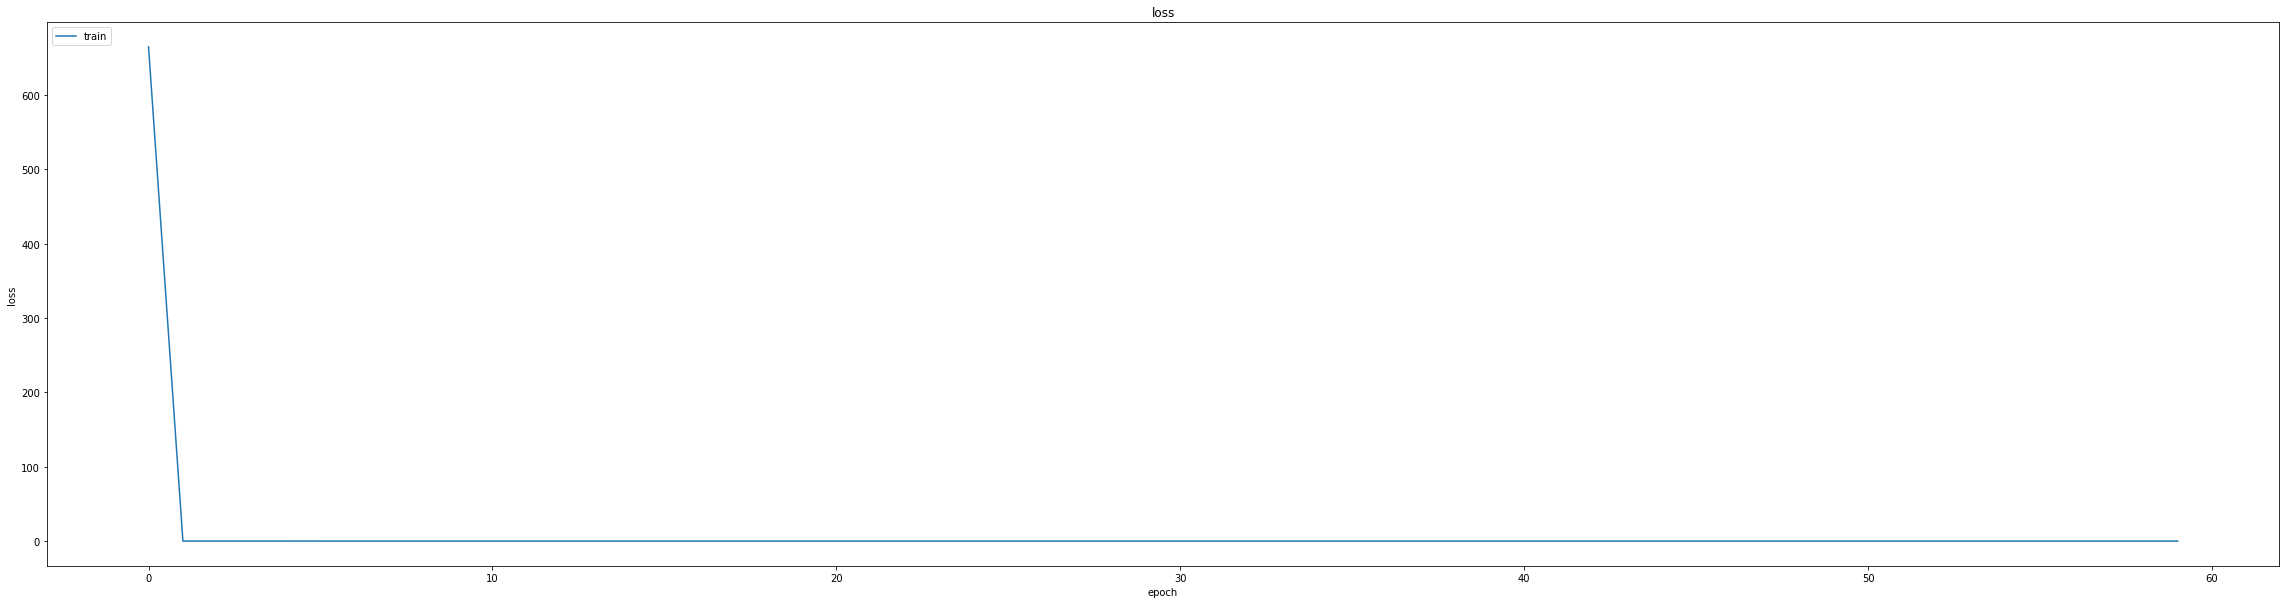

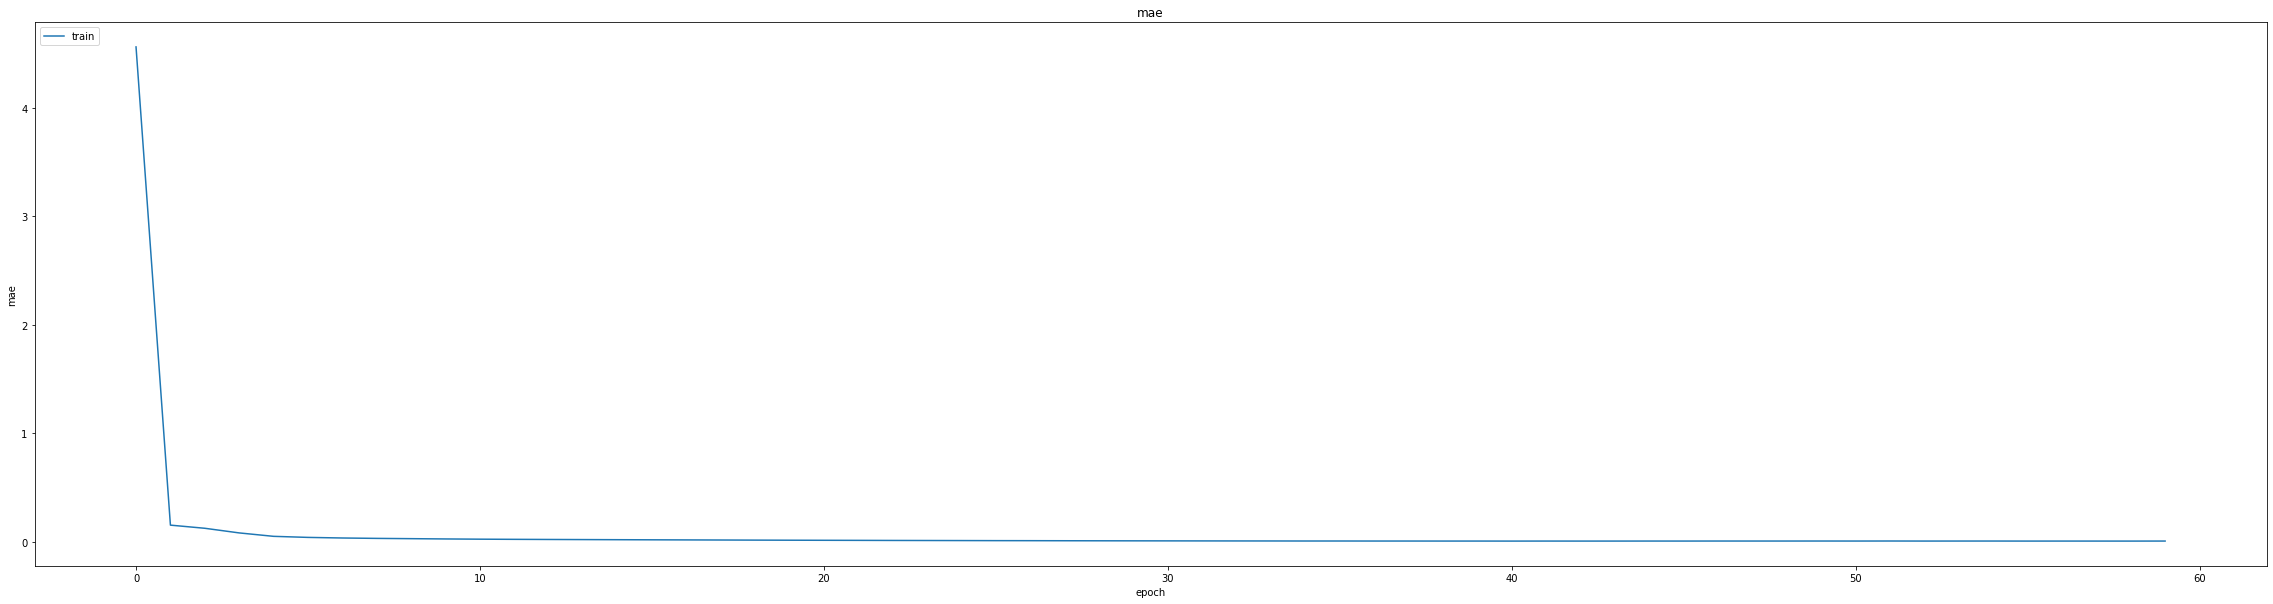

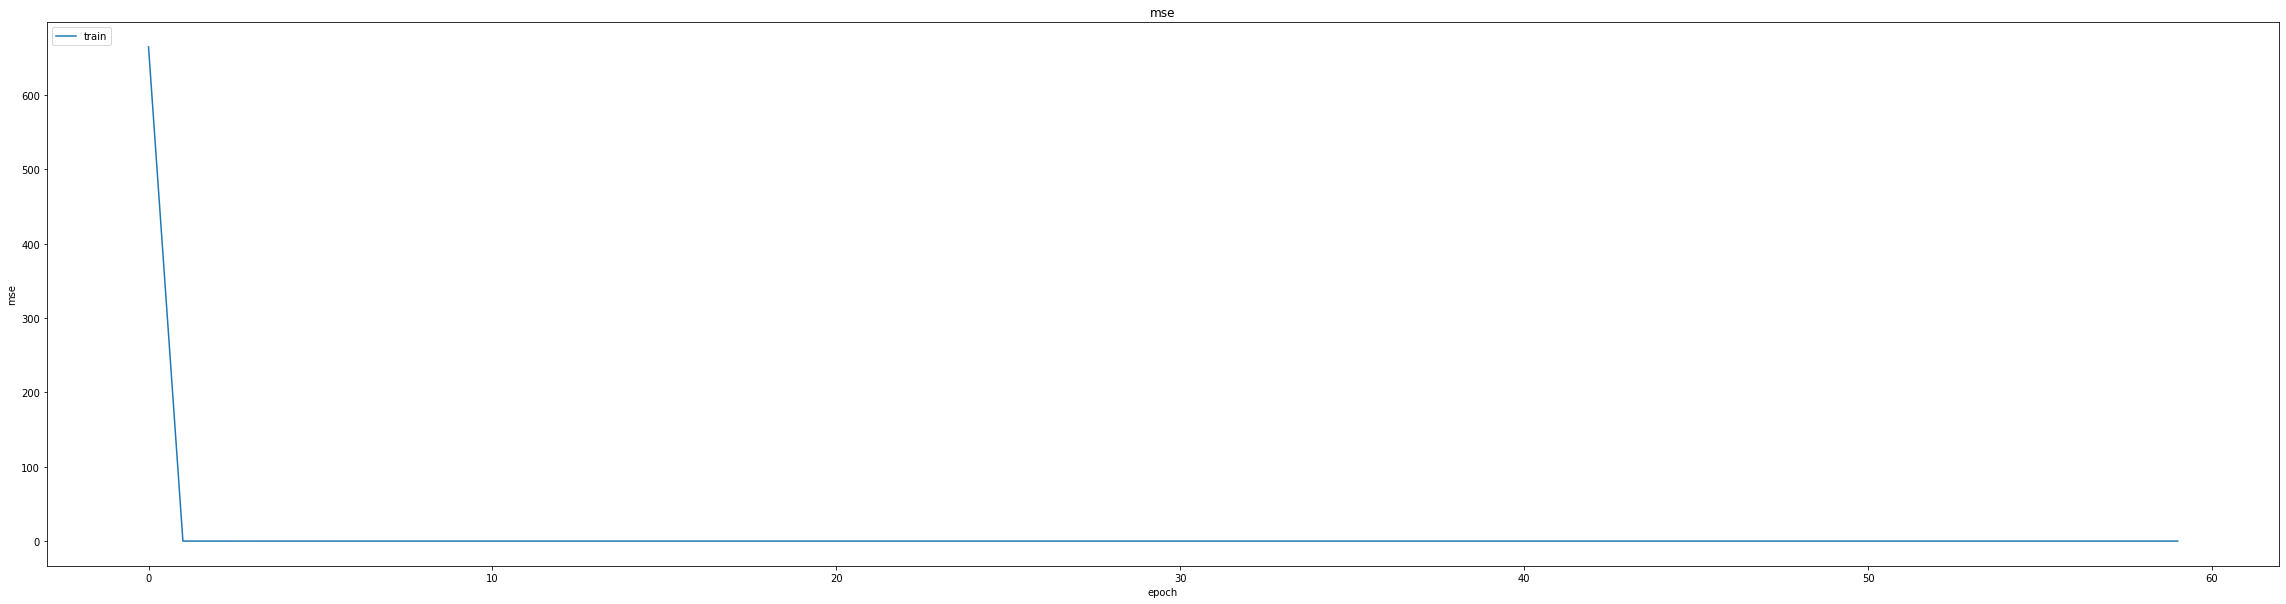

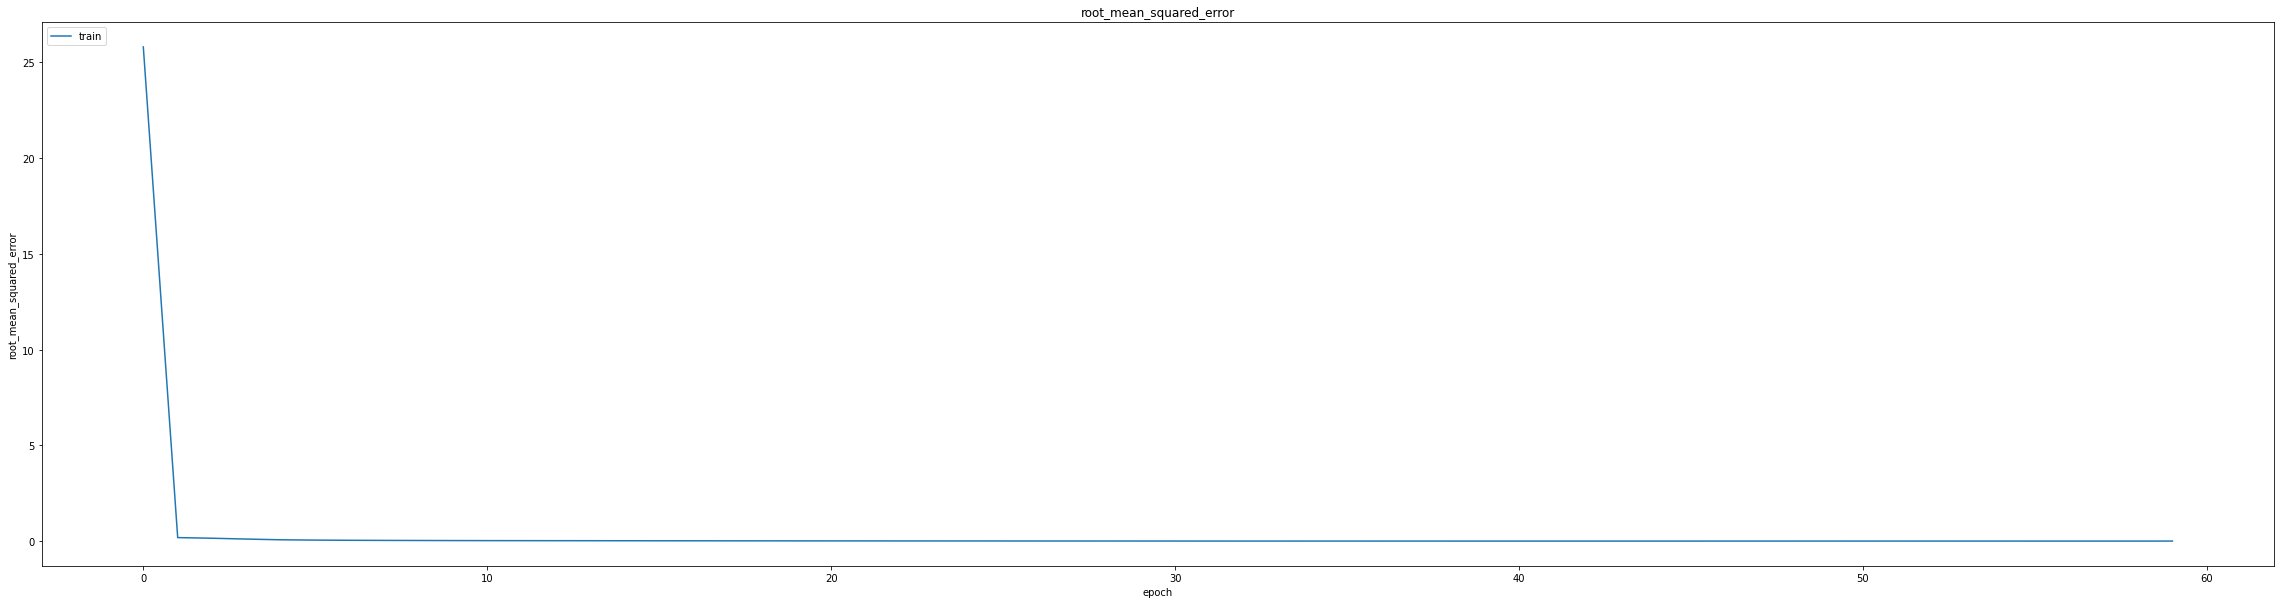

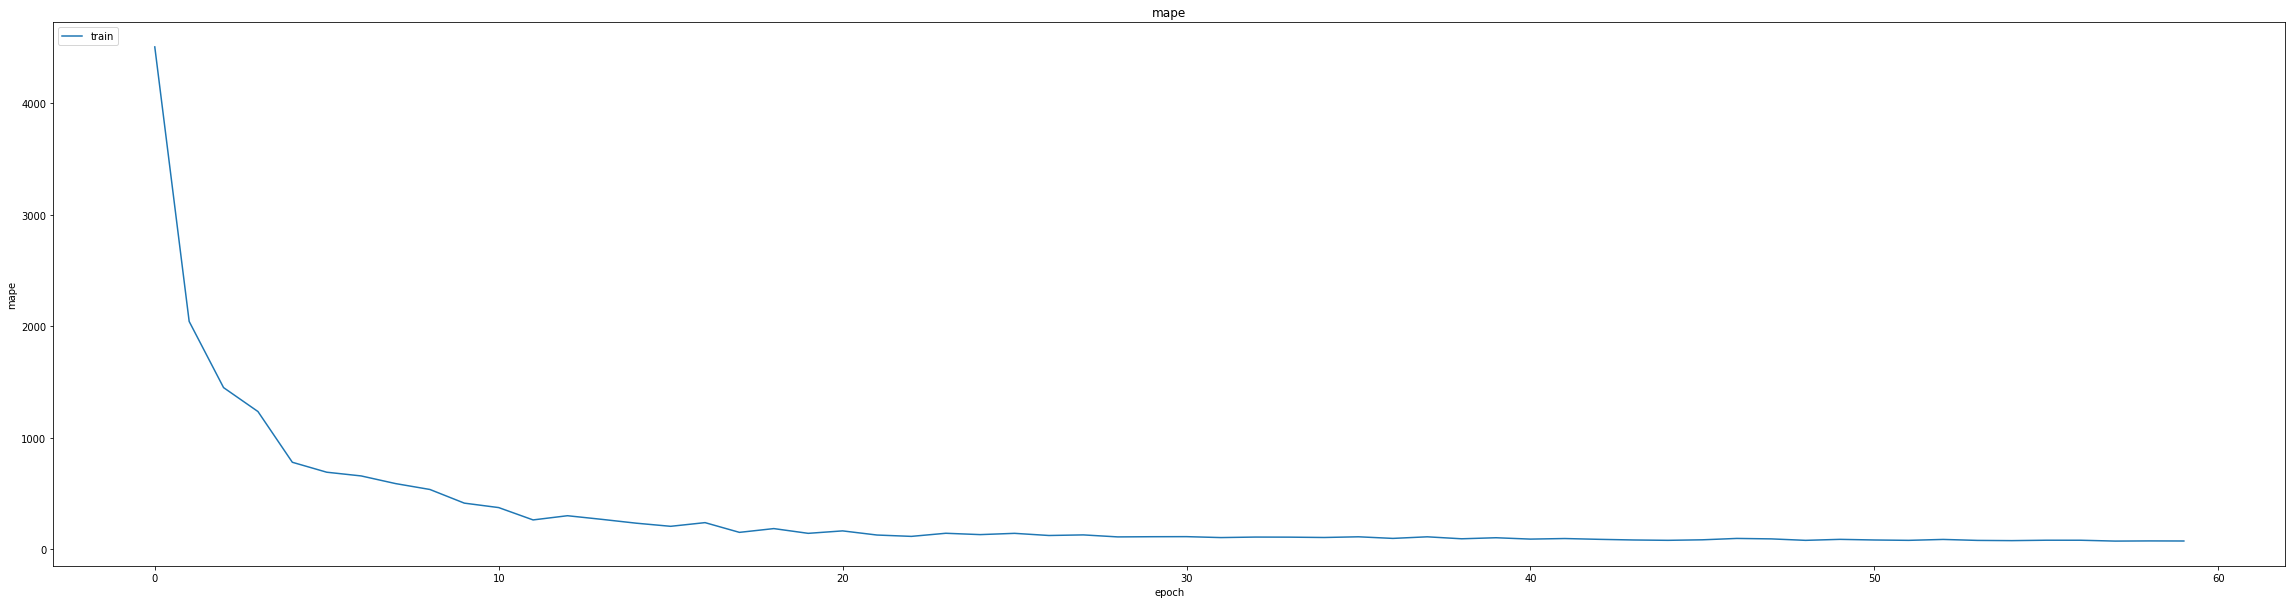

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.06287486851215363
0.0643896535038948
687/687 [==============================] - 5s 5ms/step
0.878295342613351


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=12)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
462/463 [============================>.] - ETA: 0s - loss: 1.7738e-04 - mae: 0.0051 - mse: 1.7738e-04 - root_mean_squared_error: 0.0133 - mape: 91.2518
Epoch 1: val_mse did not improve from 0.00415
463/463 [==============================] - 15s 21ms/step - loss: 1.7718e-04 - mae: 0.0051 - mse: 1.7718e-04 - root_mean_squared_error: 0.0133 - mape: 91.1384 - val_loss: 0.0052 - val_mae: 0.0706 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0721 - val_mape: 545.3549 - lr: 0.0010
Epoch 2/20
462/463 [============================>.] - ETA: 0s - loss: 1.1869e-05 - mae: 0.0025 - mse: 1.1869e-05 - root_mean_squared_error: 0.0034 - mape: 67.8167
Epoch 2: val_mse did not improve from 0.00415
463/463 [==============================] - 8s 18ms/step - loss: 1.1870e-05 - mae: 0.0025 - mse: 1.1870e-05 - root_mean_squared_error: 0.0034 - mape: 67.7329 - val_loss: 0.0050 - val_mae: 0.0689 - val_mse: 0.0050 - val_root_mean_squared_error: 0.0705 - val_mape: 471.4464 - lr: 0.0010
lr changed to

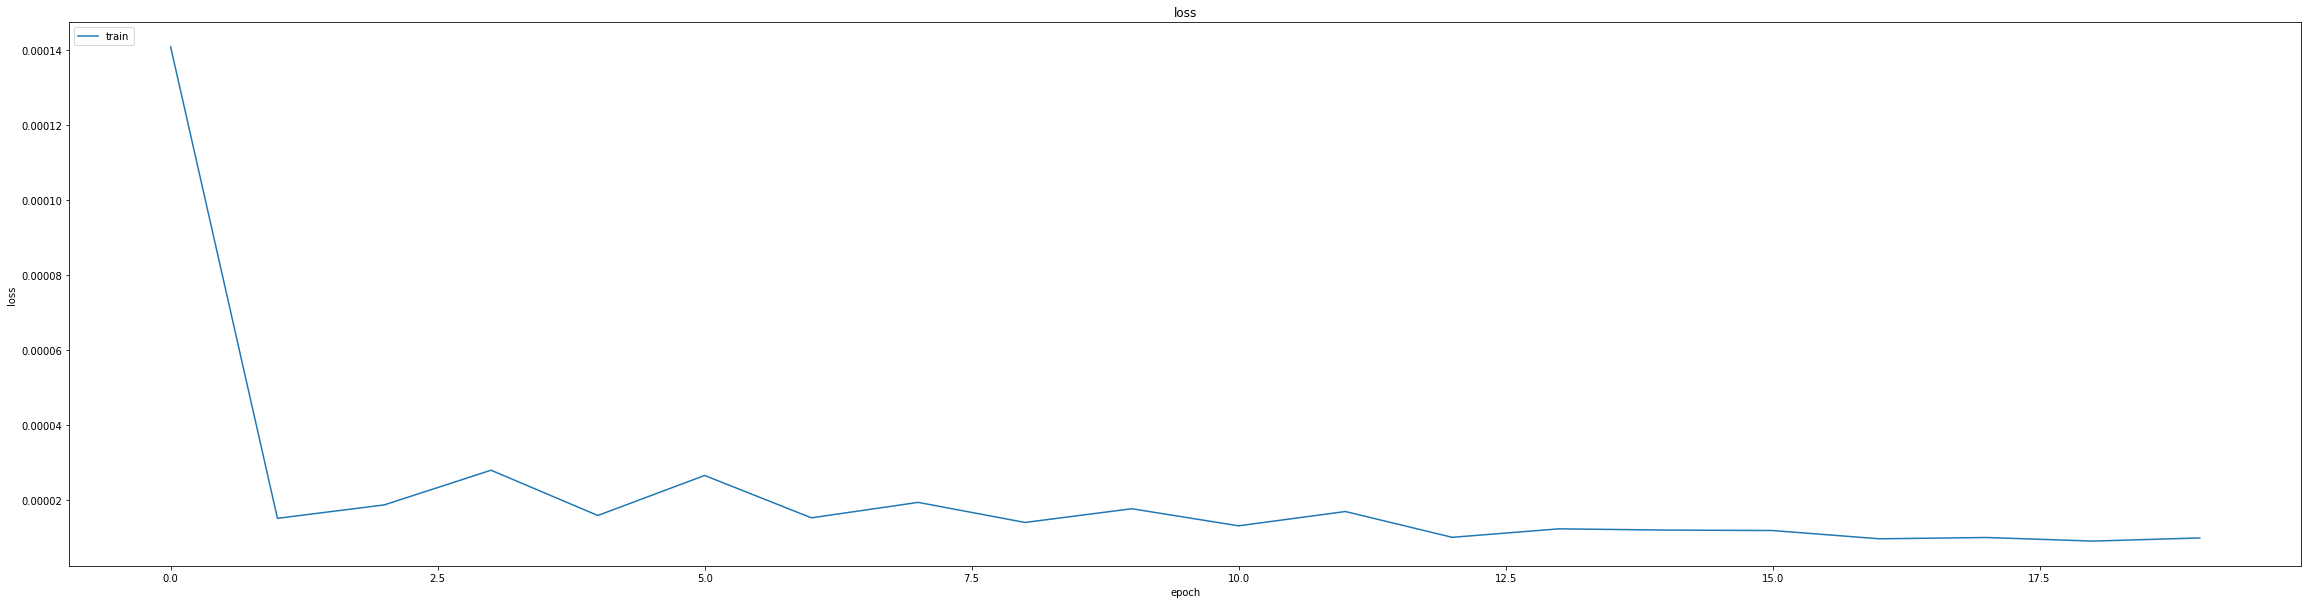

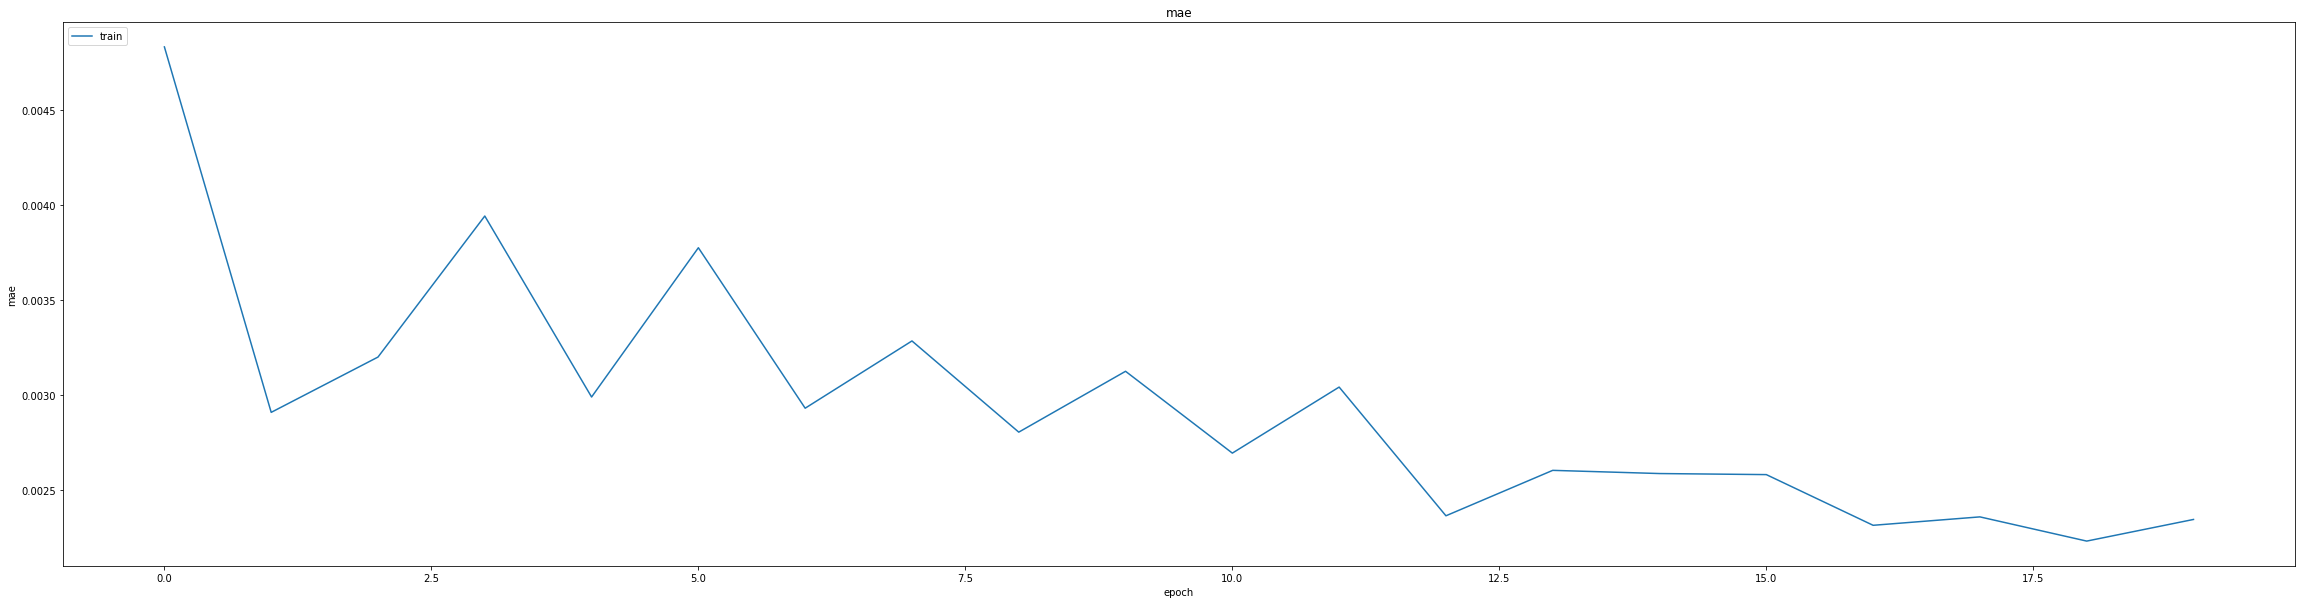

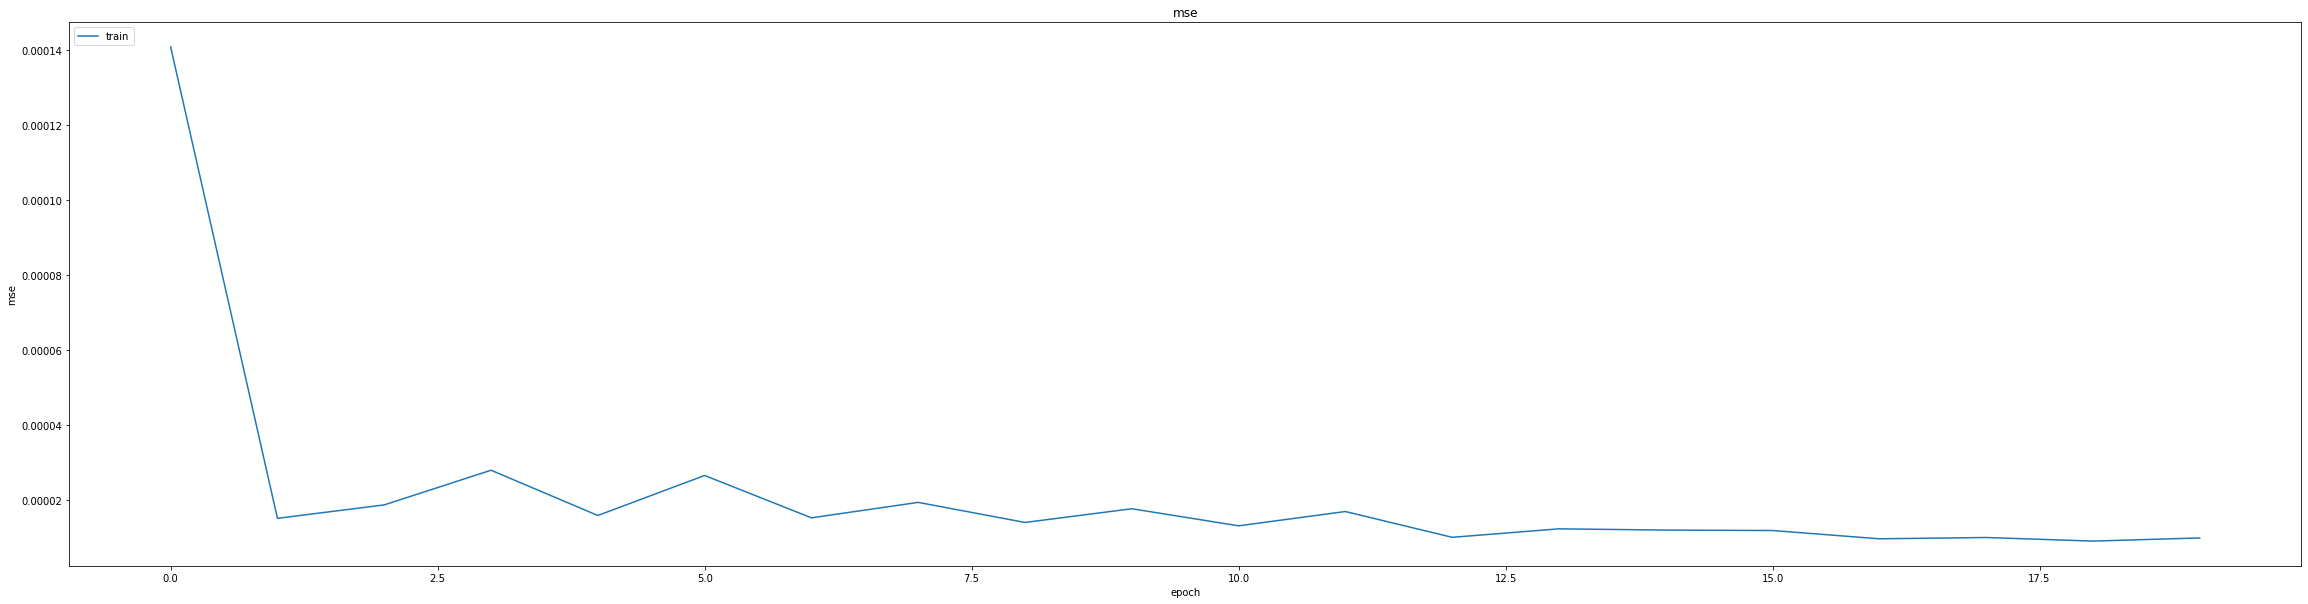

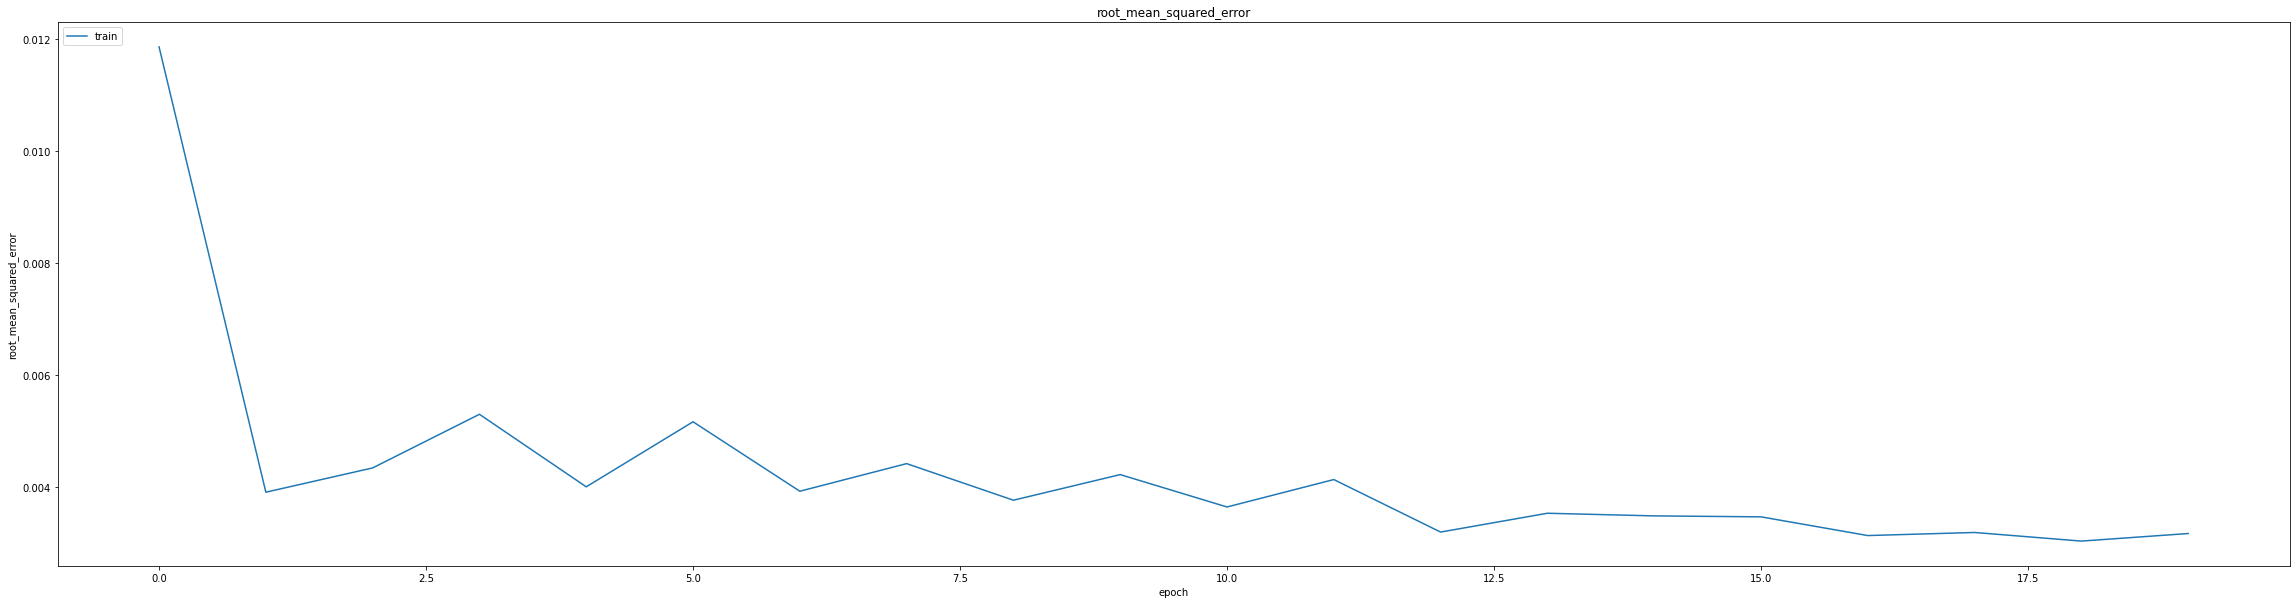

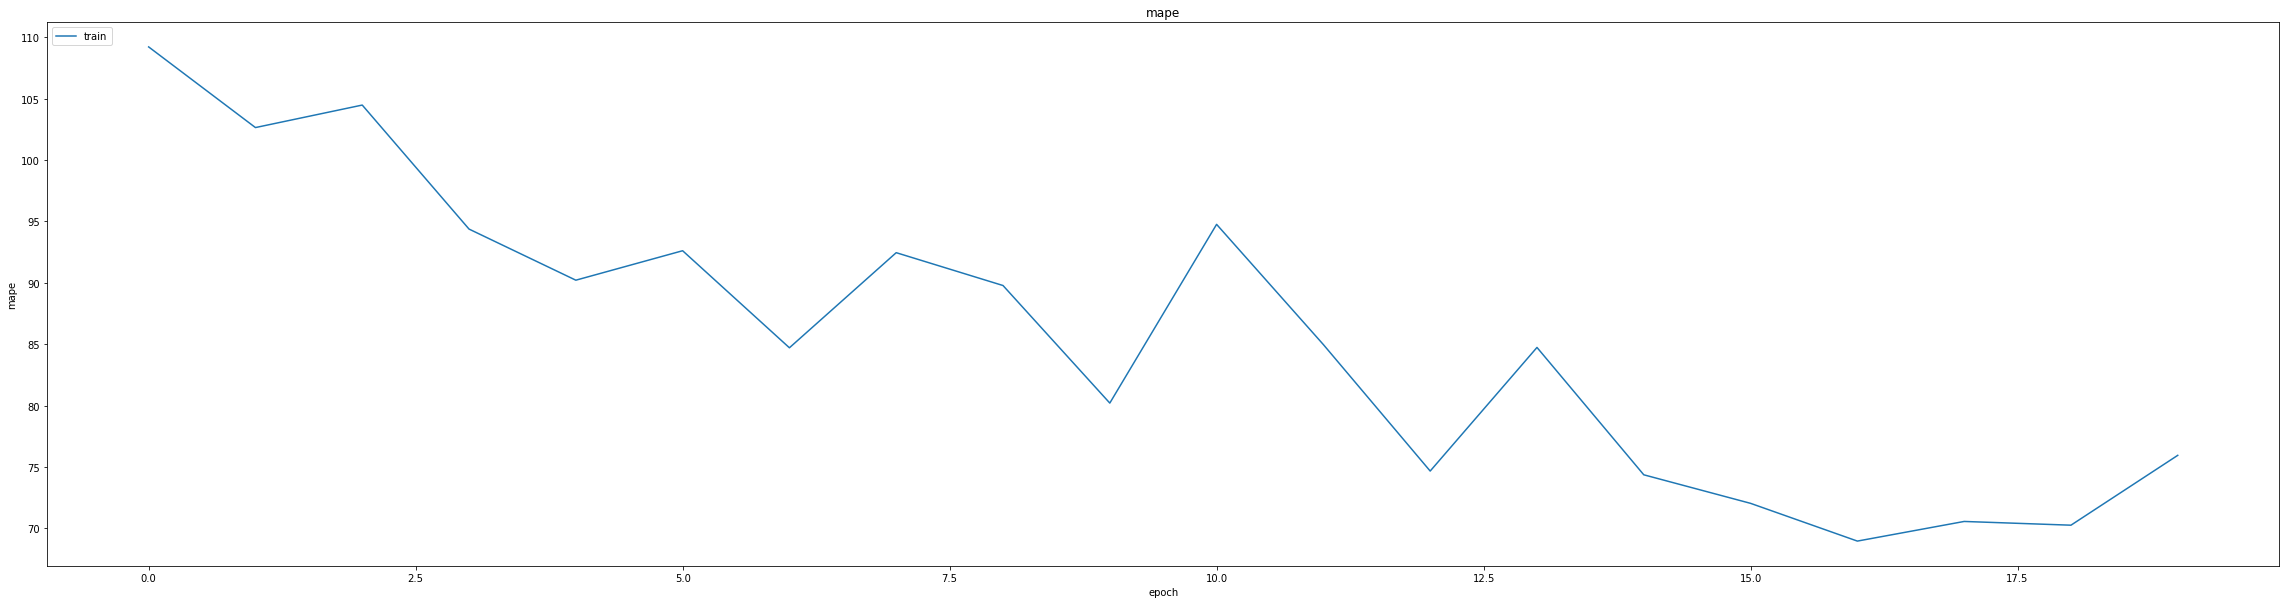

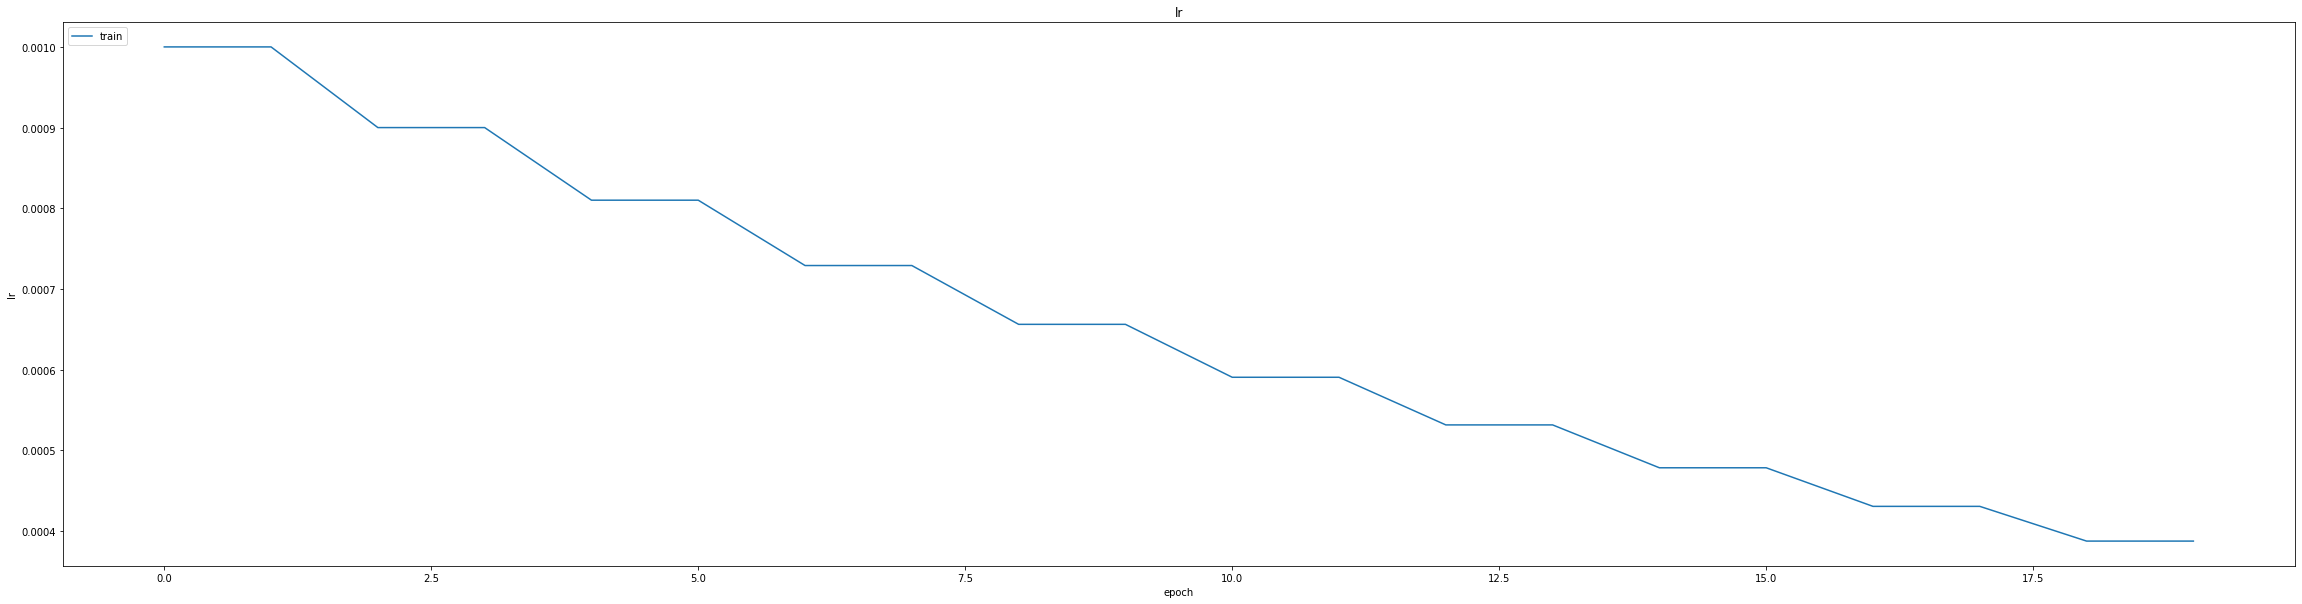

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.05657804384827614
0.05800117179751396
687/687 [==============================] - 5s 5ms/step
0.9083592269387234


687/687 [==============================] - 4s 5ms/step


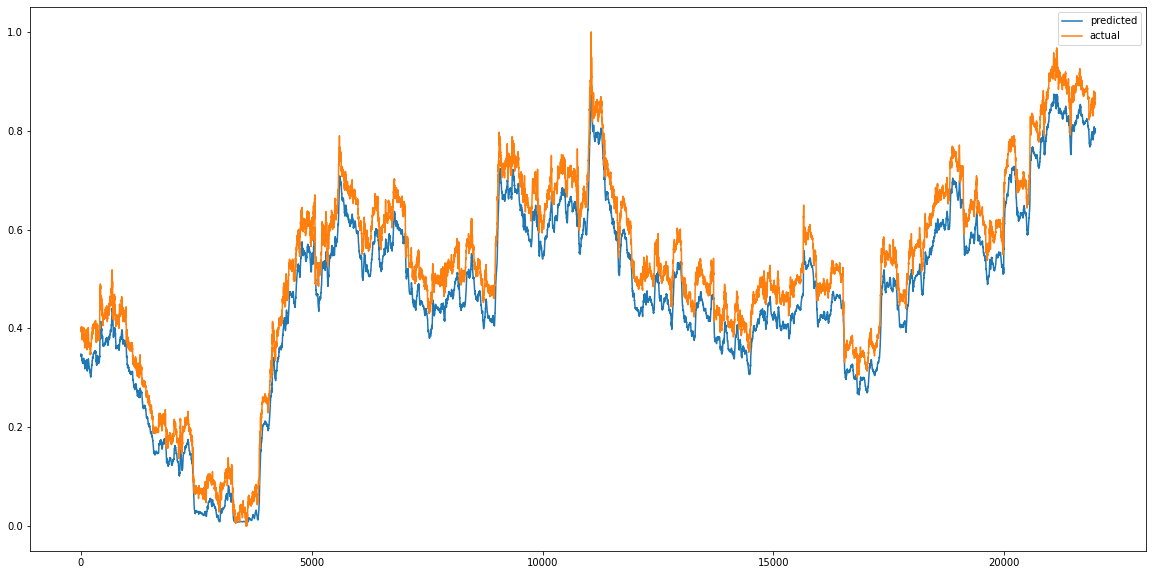

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


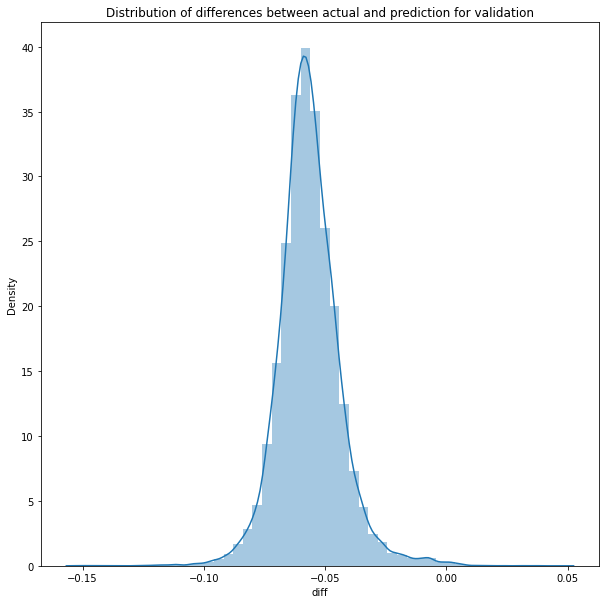

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 4s 5ms/step


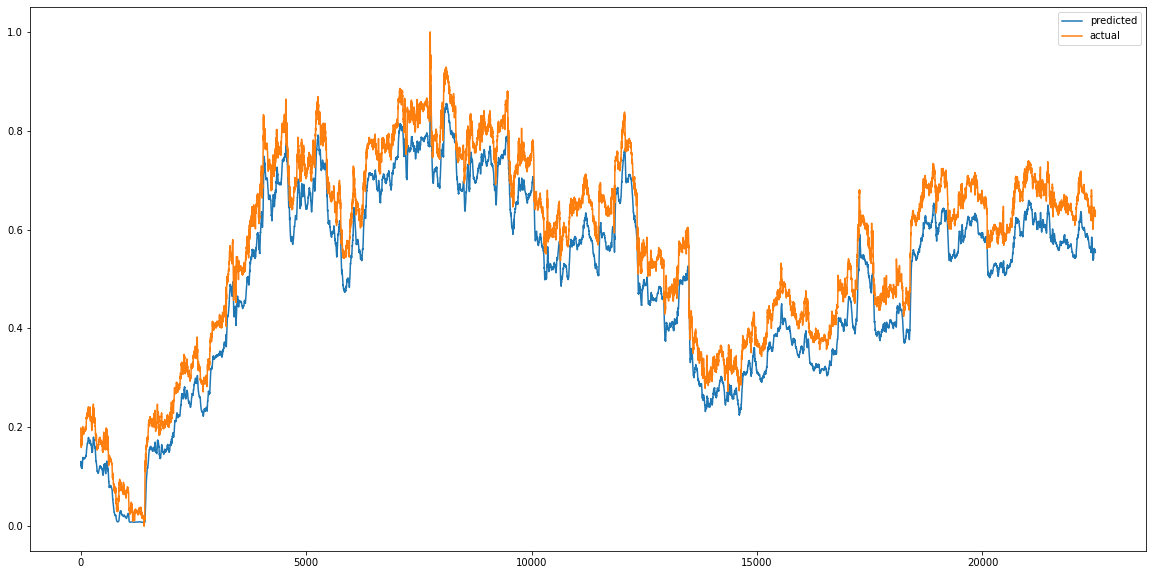

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


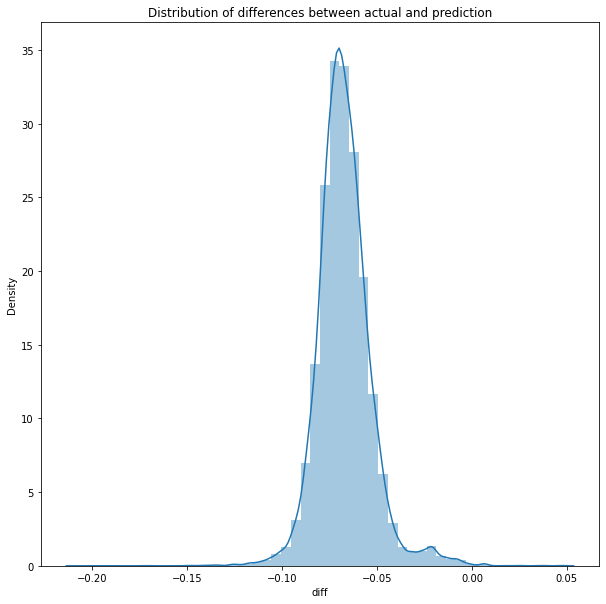

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


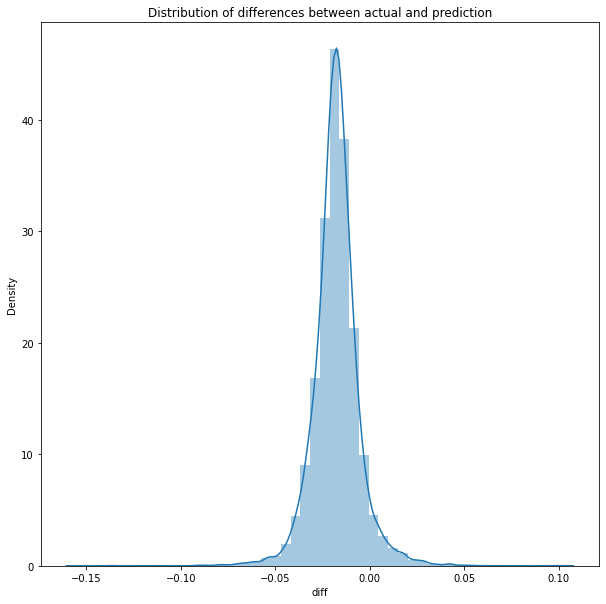

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.004712994990779236
MAE :  0.06716474053853205
RMSE :  0.06865125629425317
704/704 [==============================] - 4s 5ms/step
R2_Score  : 0.8833917640152401


count    22505.000000
mean        -0.067134
std          0.014352
min         -0.207663
25%         -0.075511
50%         -0.068171
75%         -0.060030
max          0.047705
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru (GRU)                   (None, 24, 256)           247296    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                61824     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 970.7056 - mae: 8.0300 - mse: 970.7056 - root_mean_squared_error: 31.1561 - mape: 20588.2676
Epoch 1: val_mse improved from inf to 0.06999, saving model to weights.best.hdf5
463/463 [==============================] - 248s 524ms/step - loss: 970.7056 - mae: 8.0300 - mse: 970.7056 - root_mean_squared_error: 31.1561 - mape: 20588.2676 - val_loss: 0.0700 - val_mae: 0.2282 - val_mse: 0.0700 - val_root_mean_squared_error: 0.2646 - val_mape: 16809.5508
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.0381 - mae: 0.1588 - mse: 0.0381 - root_mean_squared_error: 0.1953 - mape: 2123.8438
Epoch 2: val_mse did not improve from 0.06999
463/463 [==============================] - 239s 516ms/step - loss: 0.0381 - mae: 0.1588 - mse: 0.0381 - root_mean_squared_error: 0.1953 - mape: 2123.8438 - val_loss: 0.0740 - val_mae: 0.2363 - val_mse: 0.0740 - val_root_mean_squared_error: 0.2721 - val_mape: 16217.6074
Epoch 3

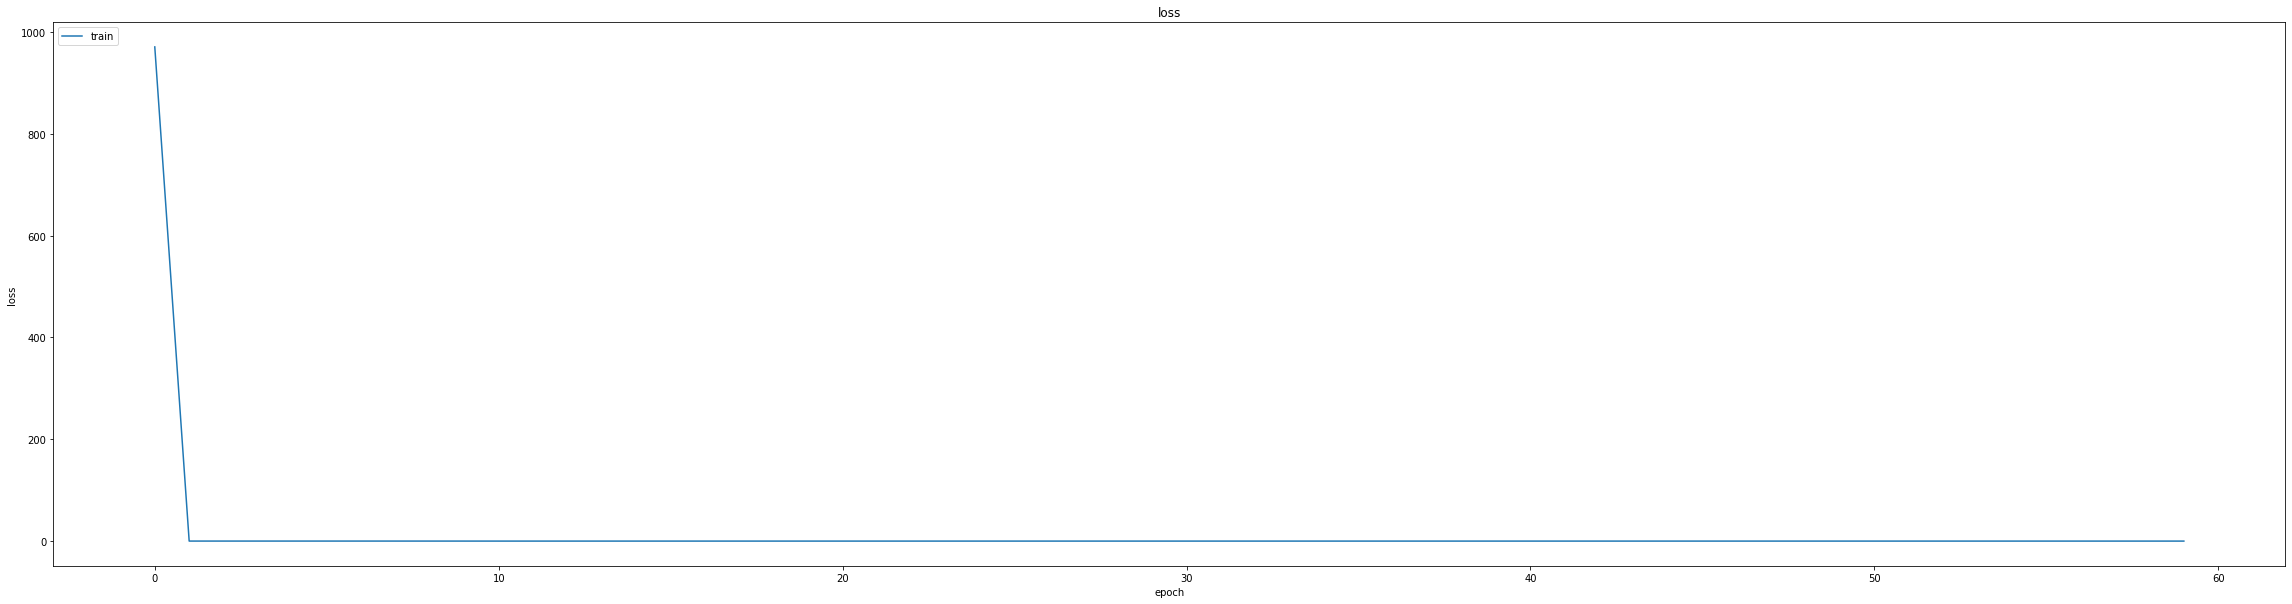

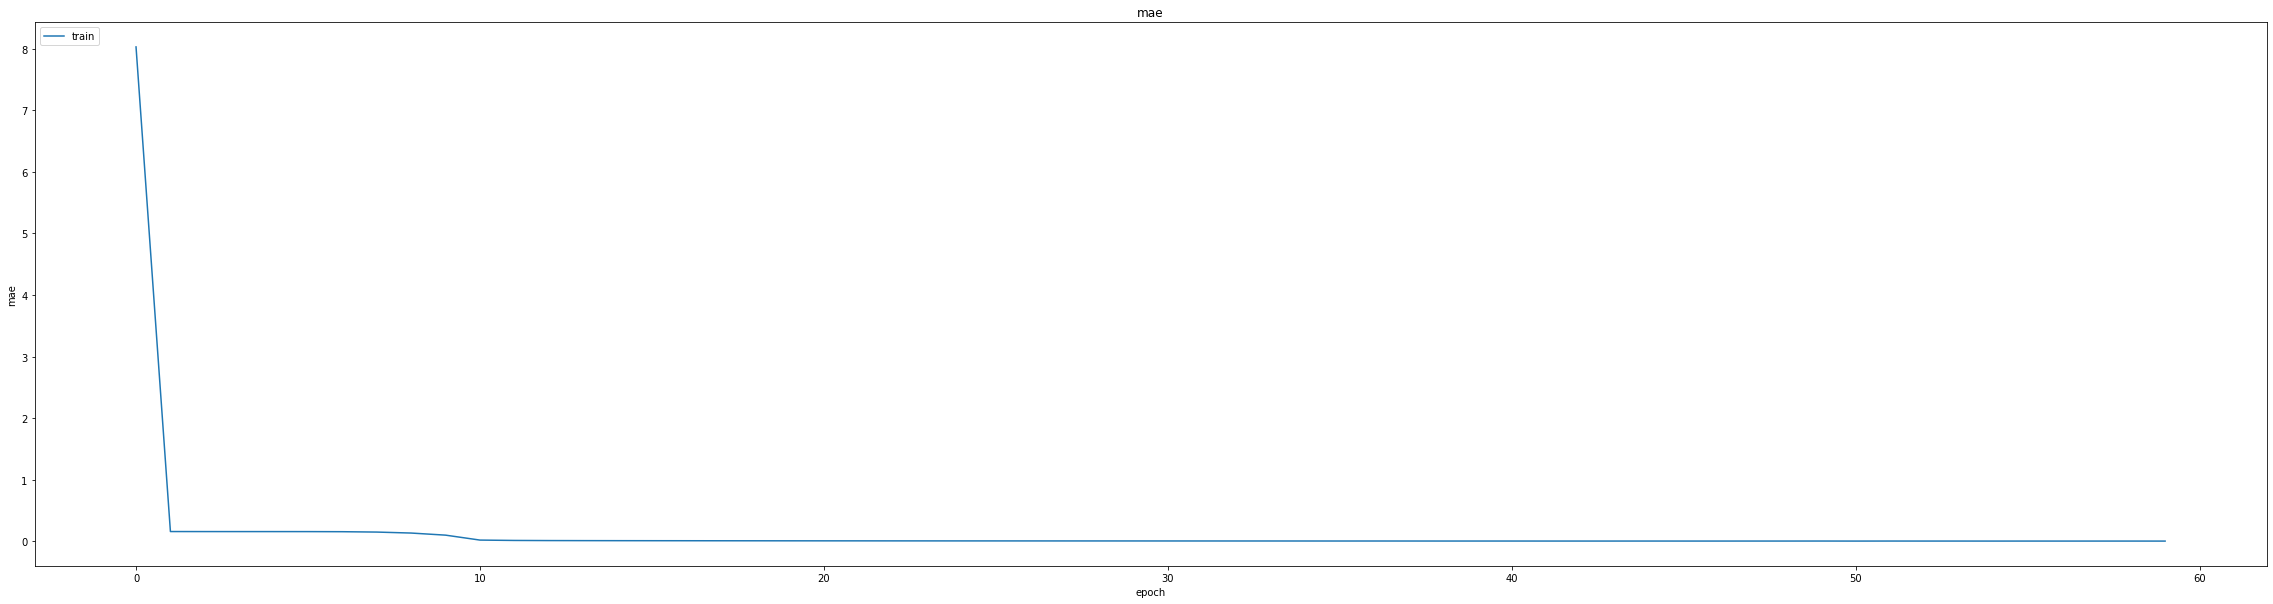

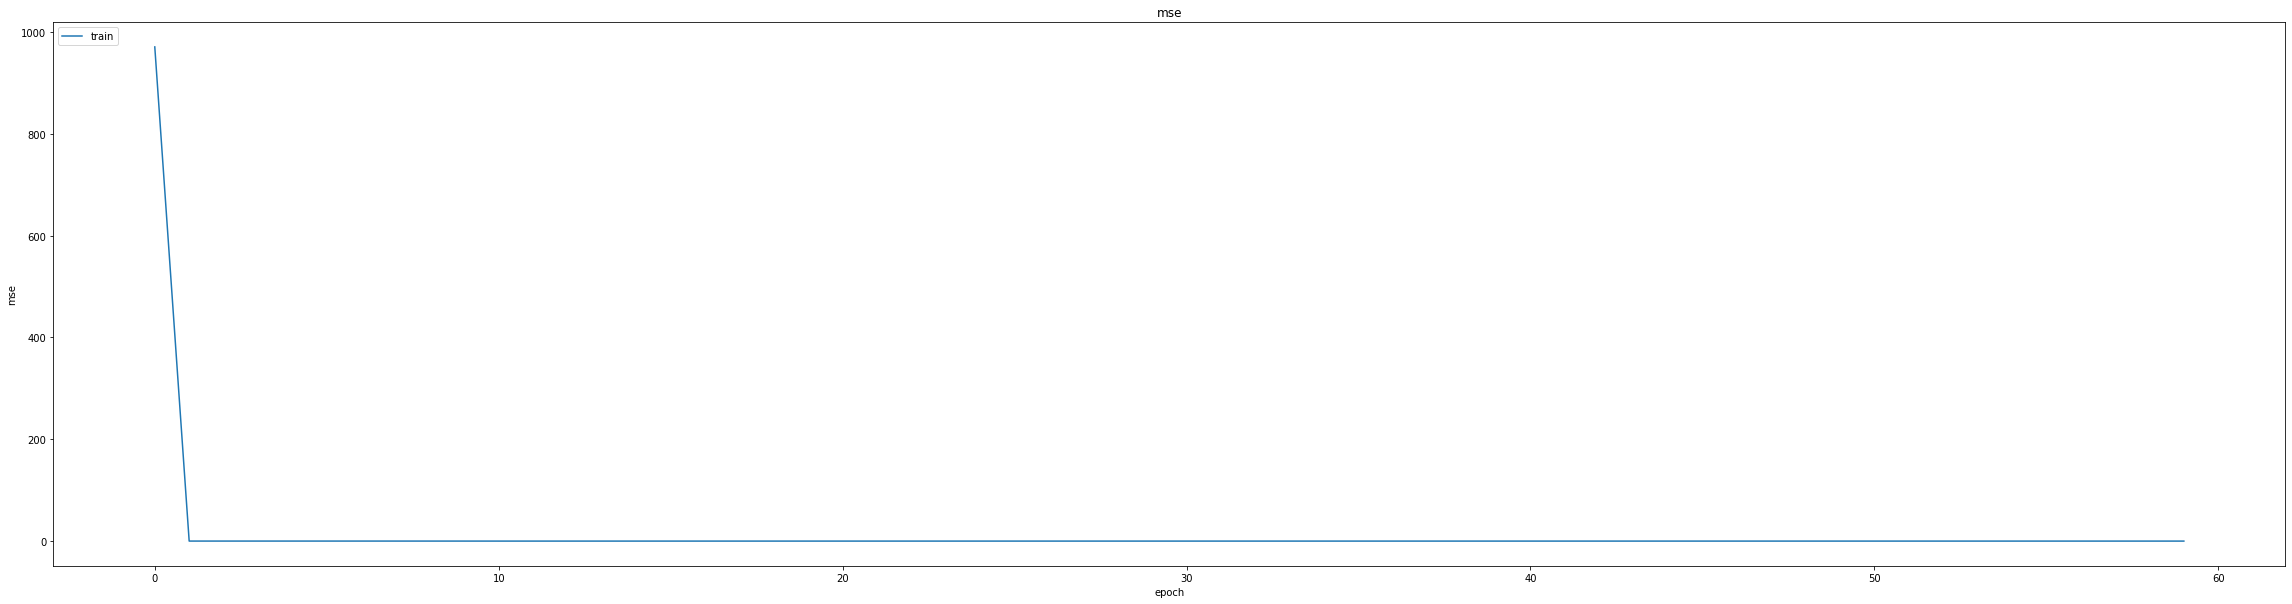

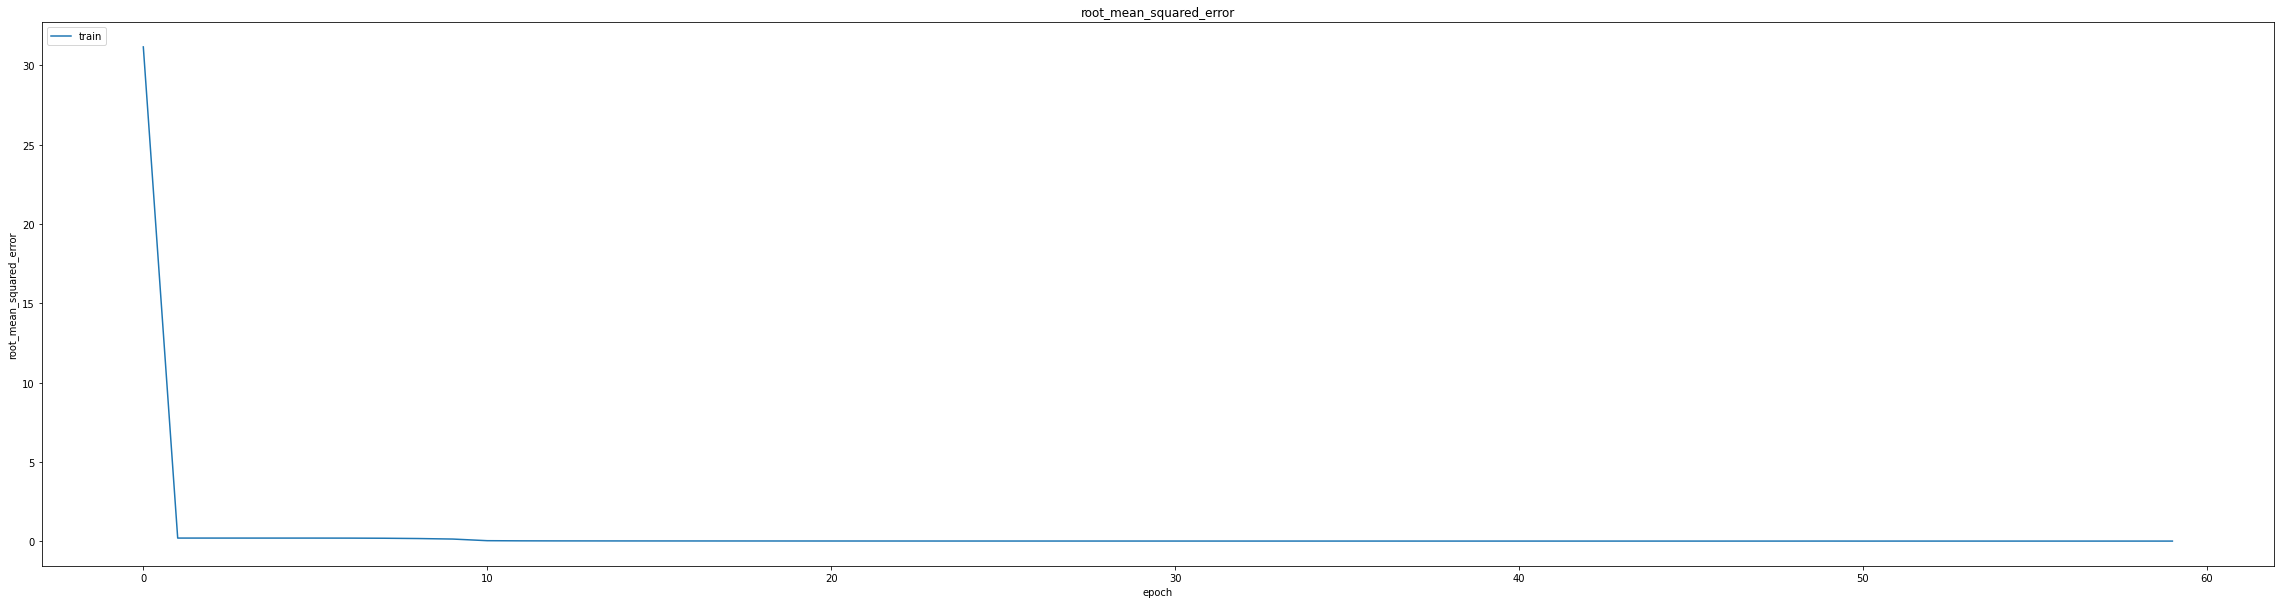

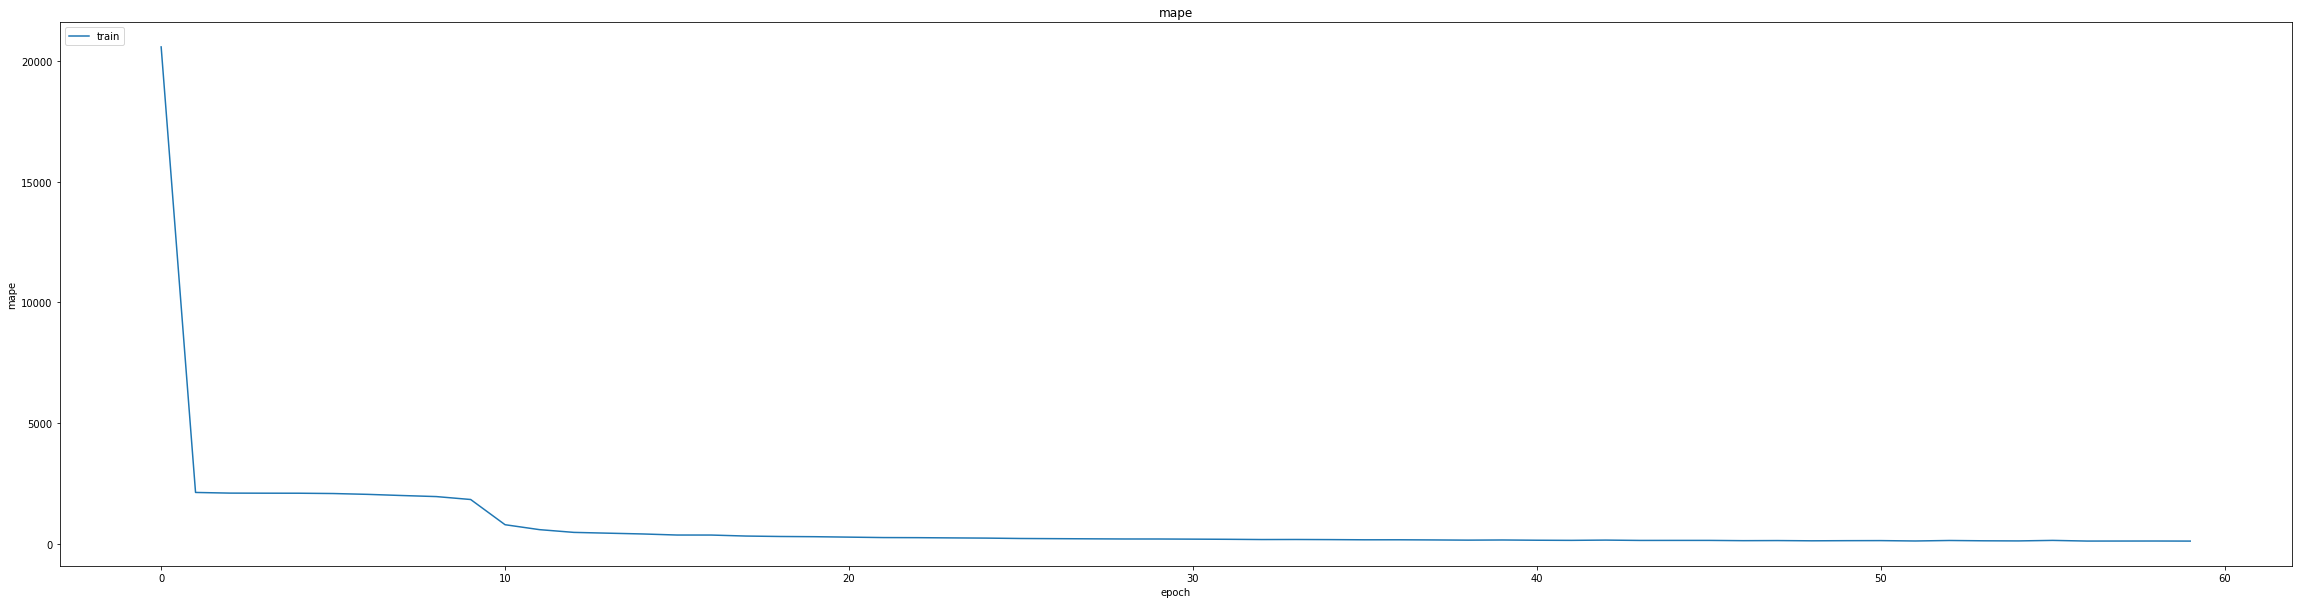

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.012338346801698208
0.016703901812434196
687/687 [==============================] - 18s 25ms/step
0.9903296037164718


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=12)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 2.1088e-04 - mae: 0.0065 - mse: 2.1088e-04 - root_mean_squared_error: 0.0145 - mape: 132.0483
Epoch 1: val_mse did not improve from 0.00028
463/463 [==============================] - 241s 513ms/step - loss: 2.1088e-04 - mae: 0.0065 - mse: 2.1088e-04 - root_mean_squared_error: 0.0145 - mape: 132.0483 - val_loss: 3.4490e-04 - val_mae: 0.0140 - val_mse: 3.4490e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 1163.2042 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 2.8350e-05 - mae: 0.0040 - mse: 2.8350e-05 - root_mean_squared_error: 0.0053 - mape: 145.0444
Epoch 2: val_mse did not improve from 0.00028
463/463 [==============================] - 235s 508ms/step - loss: 2.8350e-05 - mae: 0.0040 - mse: 2.8350e-05 - root_mean_squared_error: 0.0053 - mape: 145.0444 - val_loss: 3.0417e-04 - val_mae: 0.0131 - val_mse: 3.0417e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 1167.4491

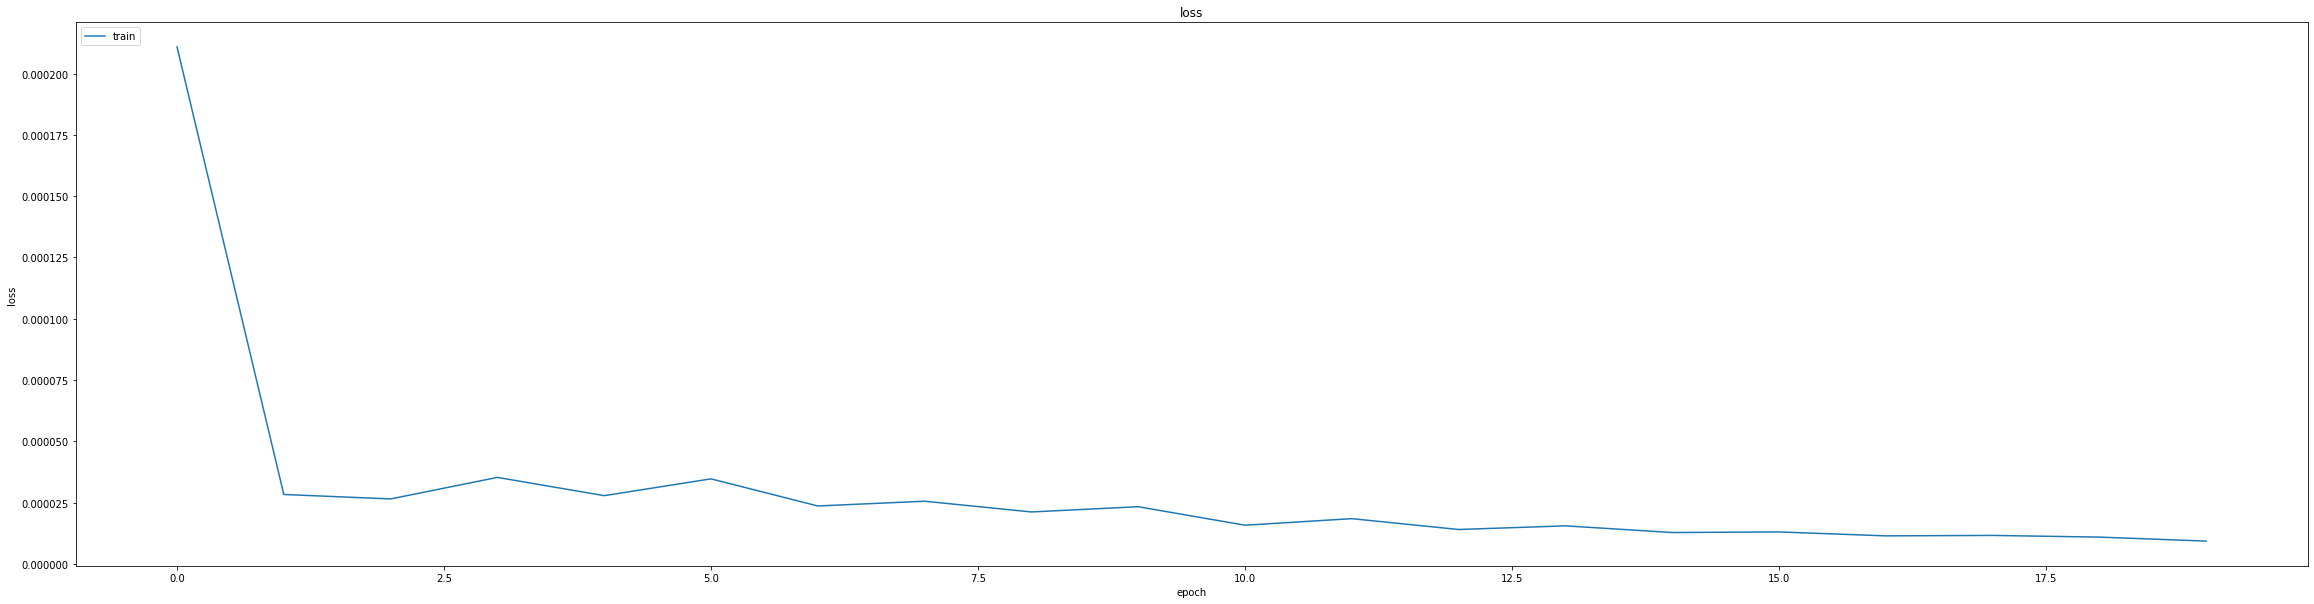

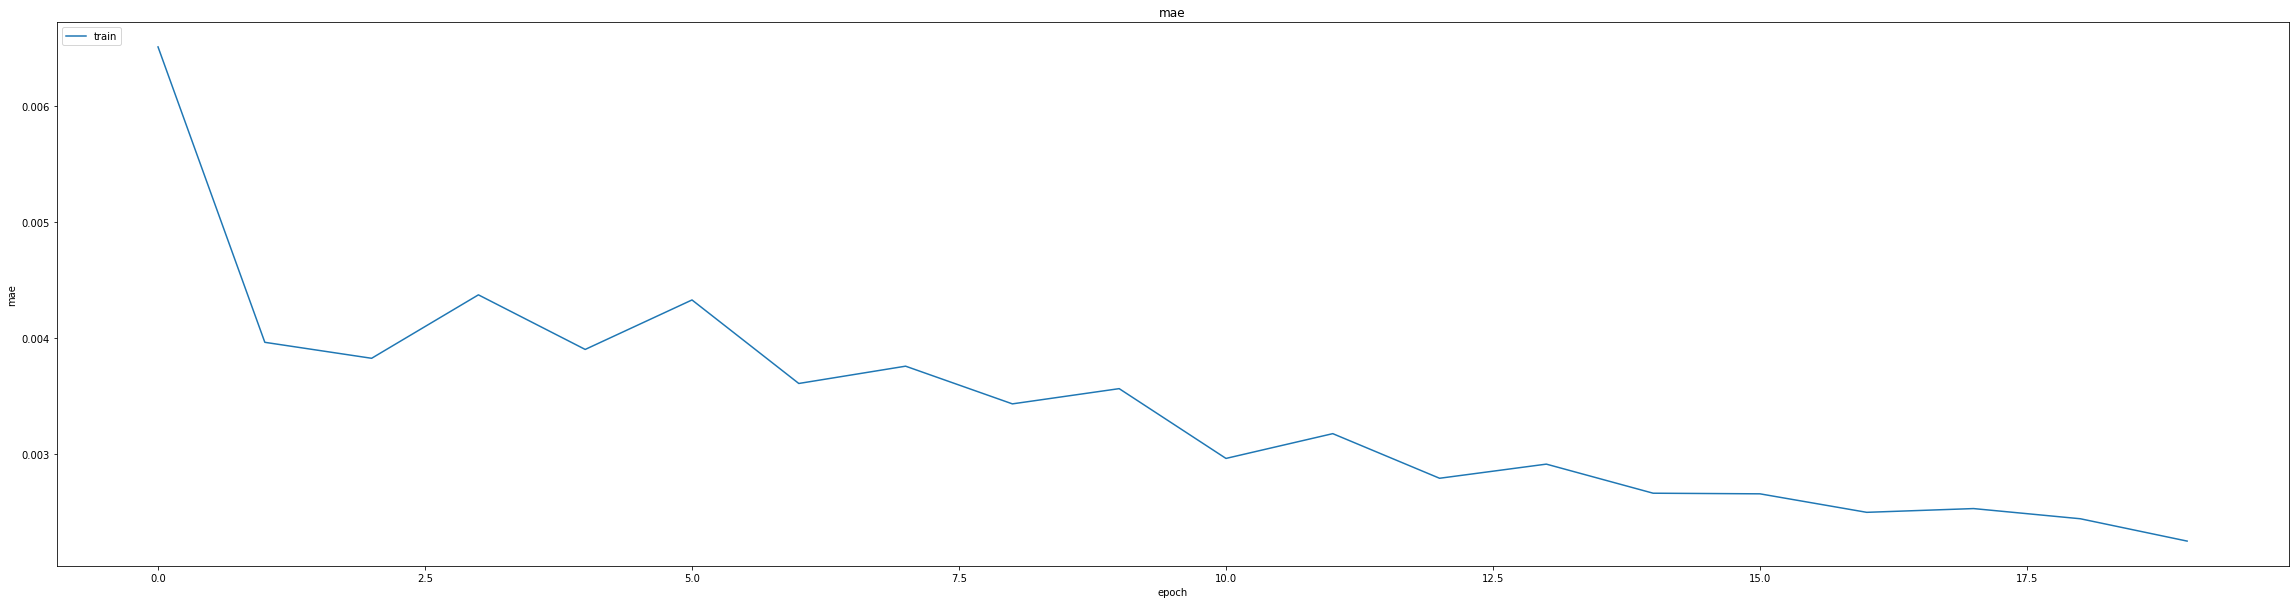

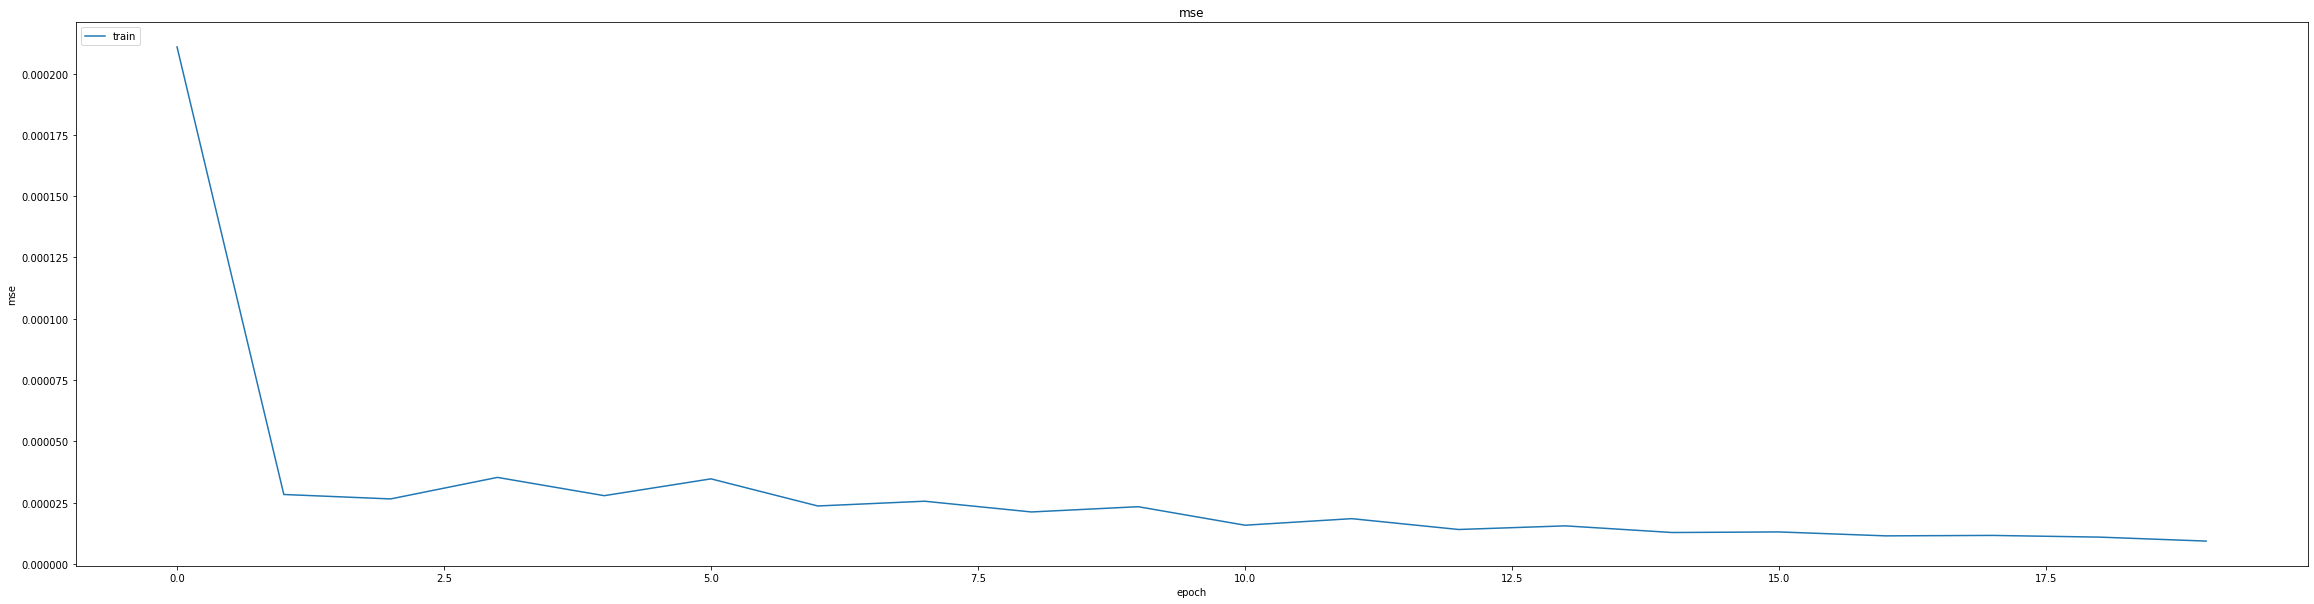

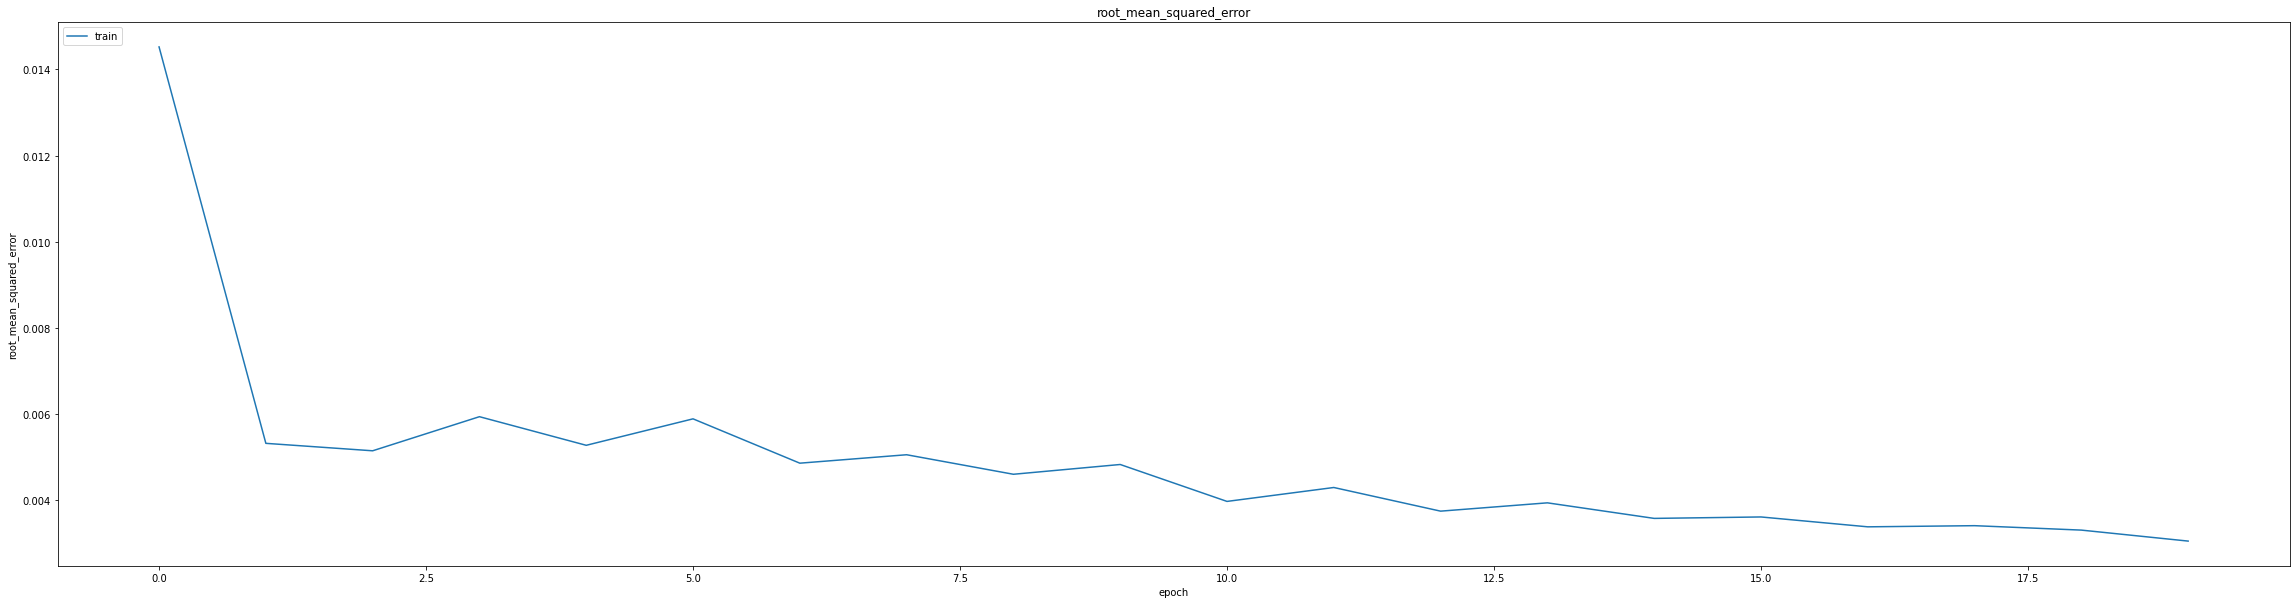

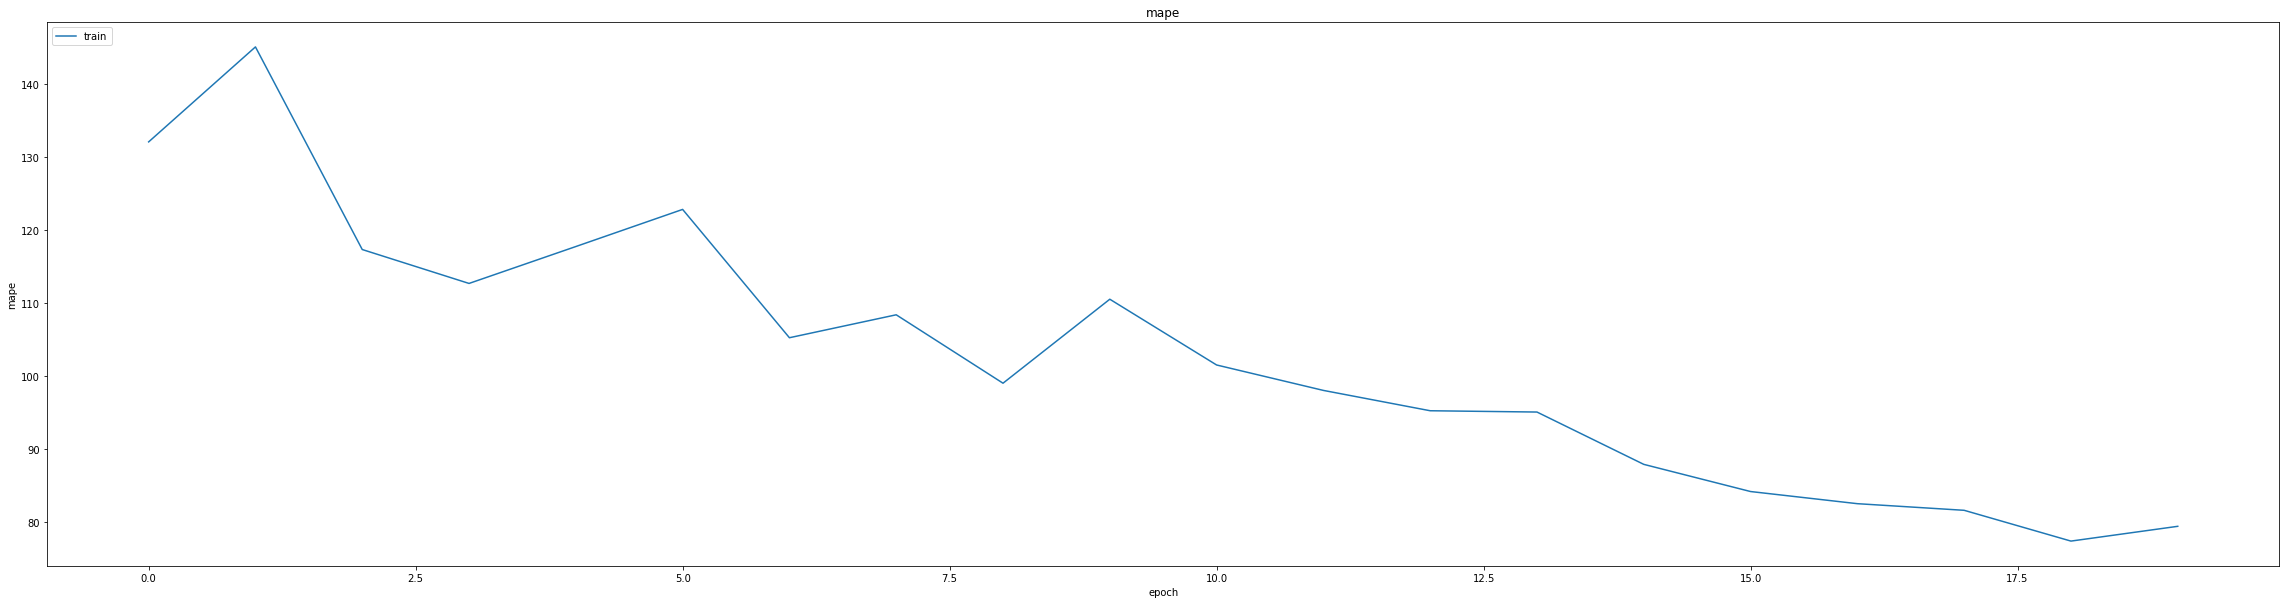

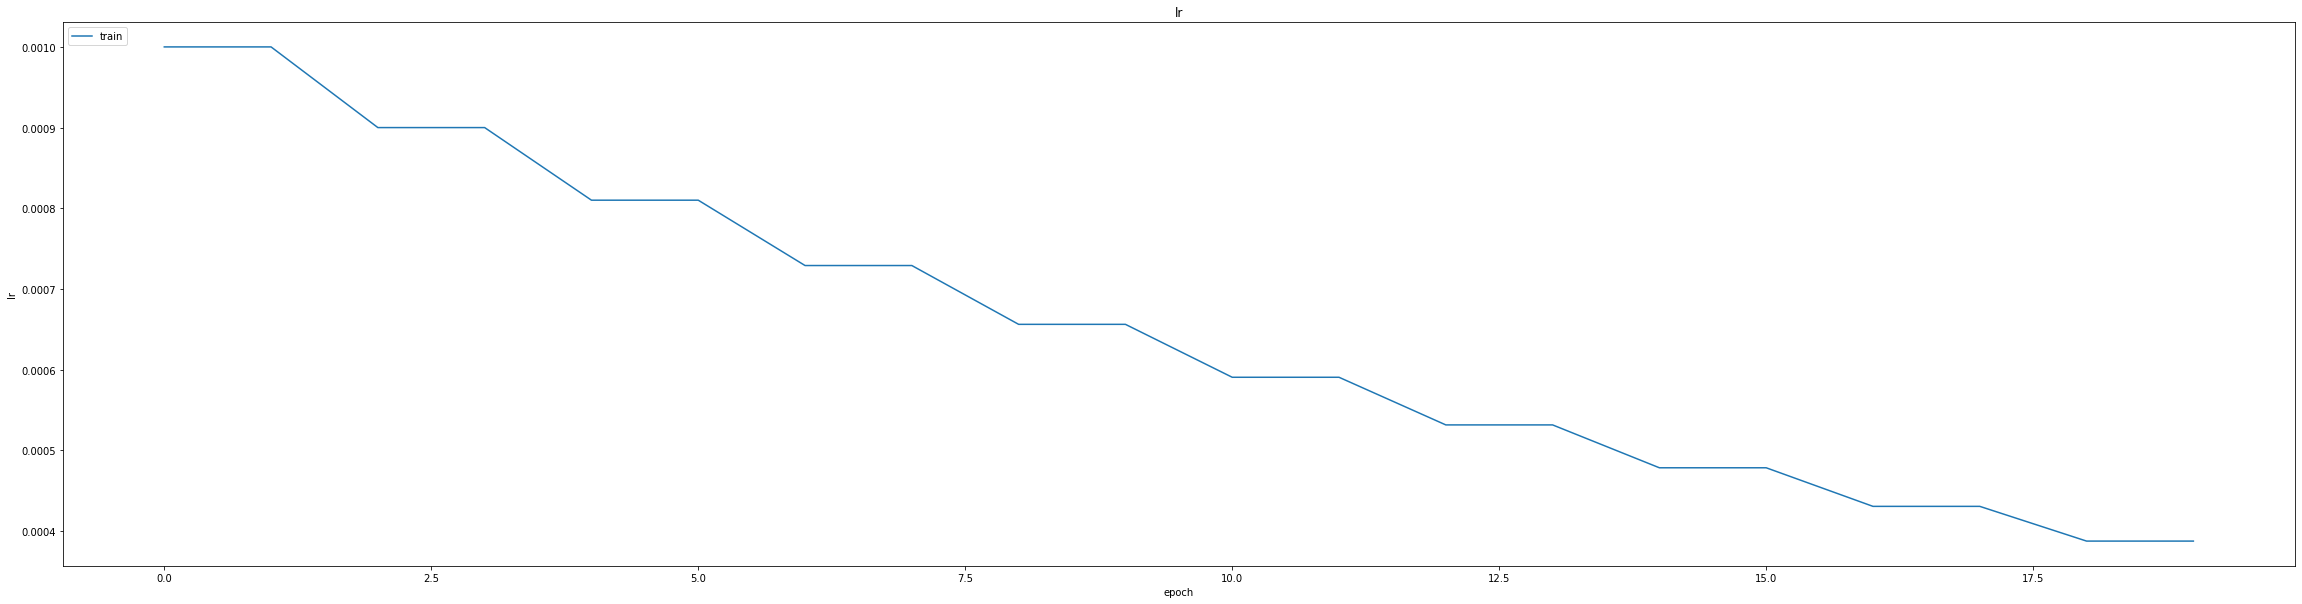

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.010038893669843674
0.013249970972537994
687/687 [==============================] - 18s 26ms/step
0.989071990563505


687/687 [==============================] - 18s 26ms/step


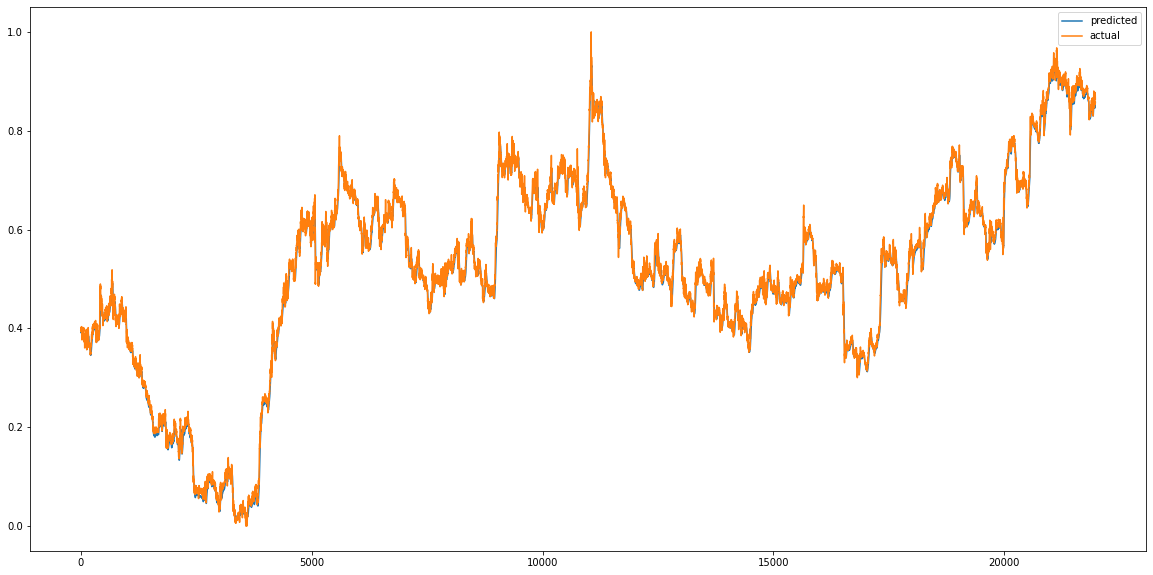

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


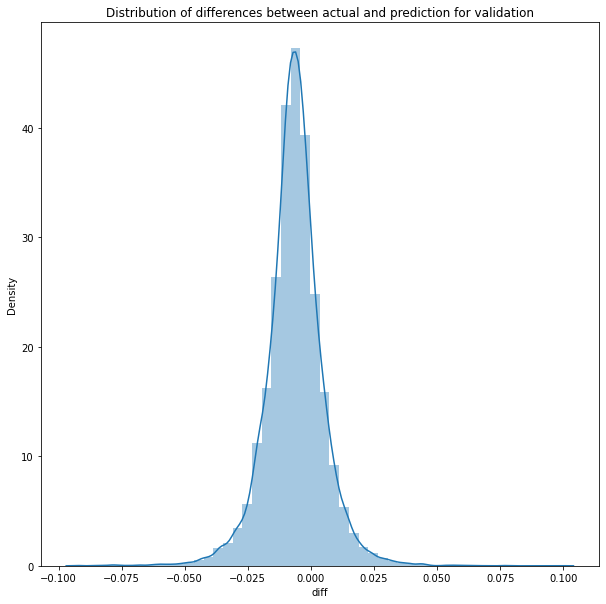

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 28s 40ms/step


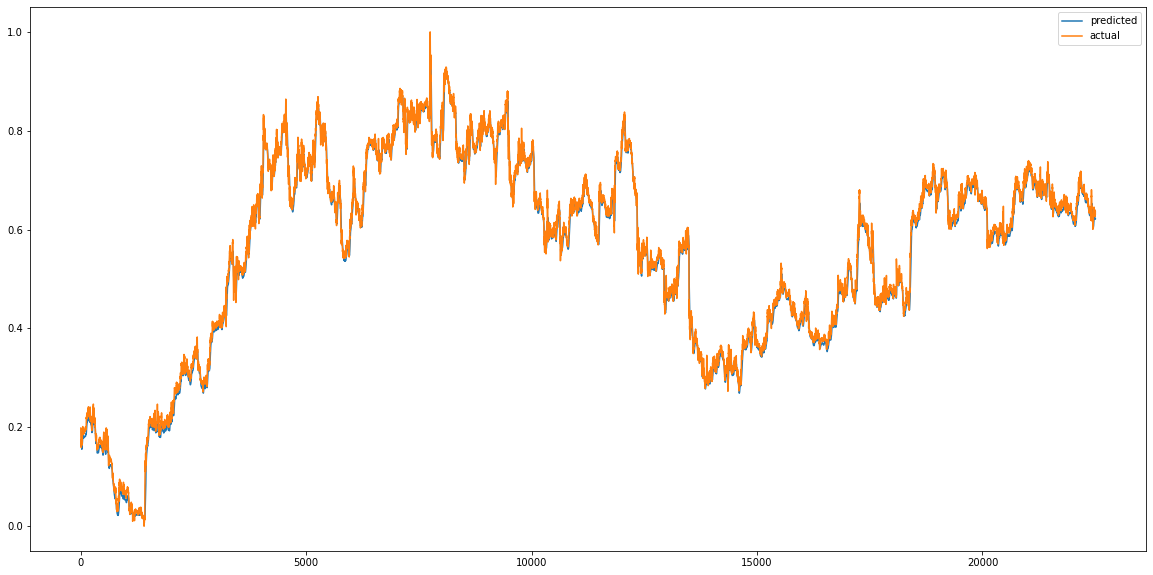

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


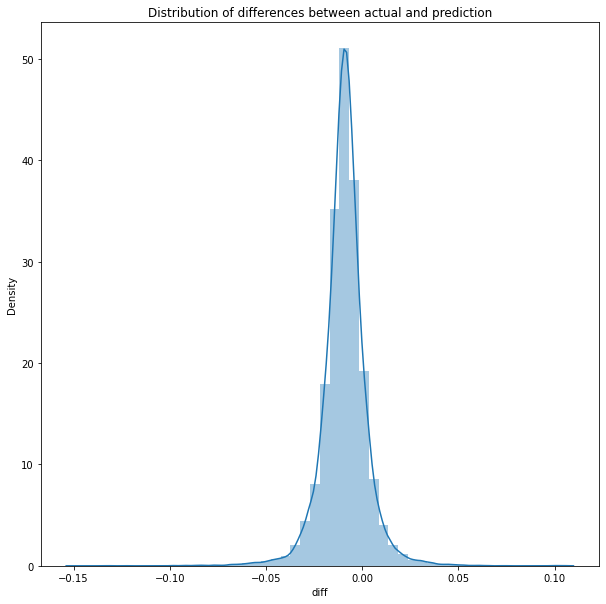

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.00021921513390709581
MAE :  0.011545107790683408
RMSE  : 0.014805915503848311
704/704 [==============================] - 19s 27ms/step
R2_Score  : 0.9945762110701835


count    22505.000000
mean        -0.009195
std          0.011605
min         -0.149143
25%         -0.014556
50%         -0.009061
75%         -0.003681
max          0.105120
Name: diff, dtype: float64

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           328704    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value

early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=60
Batch_size= 385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 251.3766 - mae: 2.1576 - mse: 251.3766 - root_mean_squared_error: 15.8549 - mape: 18538.3398
Epoch 1: val_mse improved from inf to 0.05017, saving model to weights.best.hdf5
463/463 [==============================] - 292s 617ms/step - loss: 251.3766 - mae: 2.1576 - mse: 251.3766 - root_mean_squared_error: 15.8549 - mape: 18538.3398 - val_loss: 0.0502 - val_mae: 0.1824 - val_mse: 0.0502 - val_root_mean_squared_error: 0.2240 - val_mape: 21409.8887
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.0356 - mae: 0.1585 - mse: 0.0356 - root_mean_squared_error: 0.1887 - mape: 2719.9229
Epoch 2: val_mse improved from 0.05017 to 0.01145, saving model to weights.best.hdf5
463/463 [==============================] - 288s 622ms/step - loss: 0.0356 - mae: 0.1585 - mse: 0.0356 - root_mean_squared_error: 0.1887 - mape: 2719.9229 - val_loss: 0.0114 - val_mae: 0.0719 - val_mse: 0.0114 - val_root_mean_squared_error

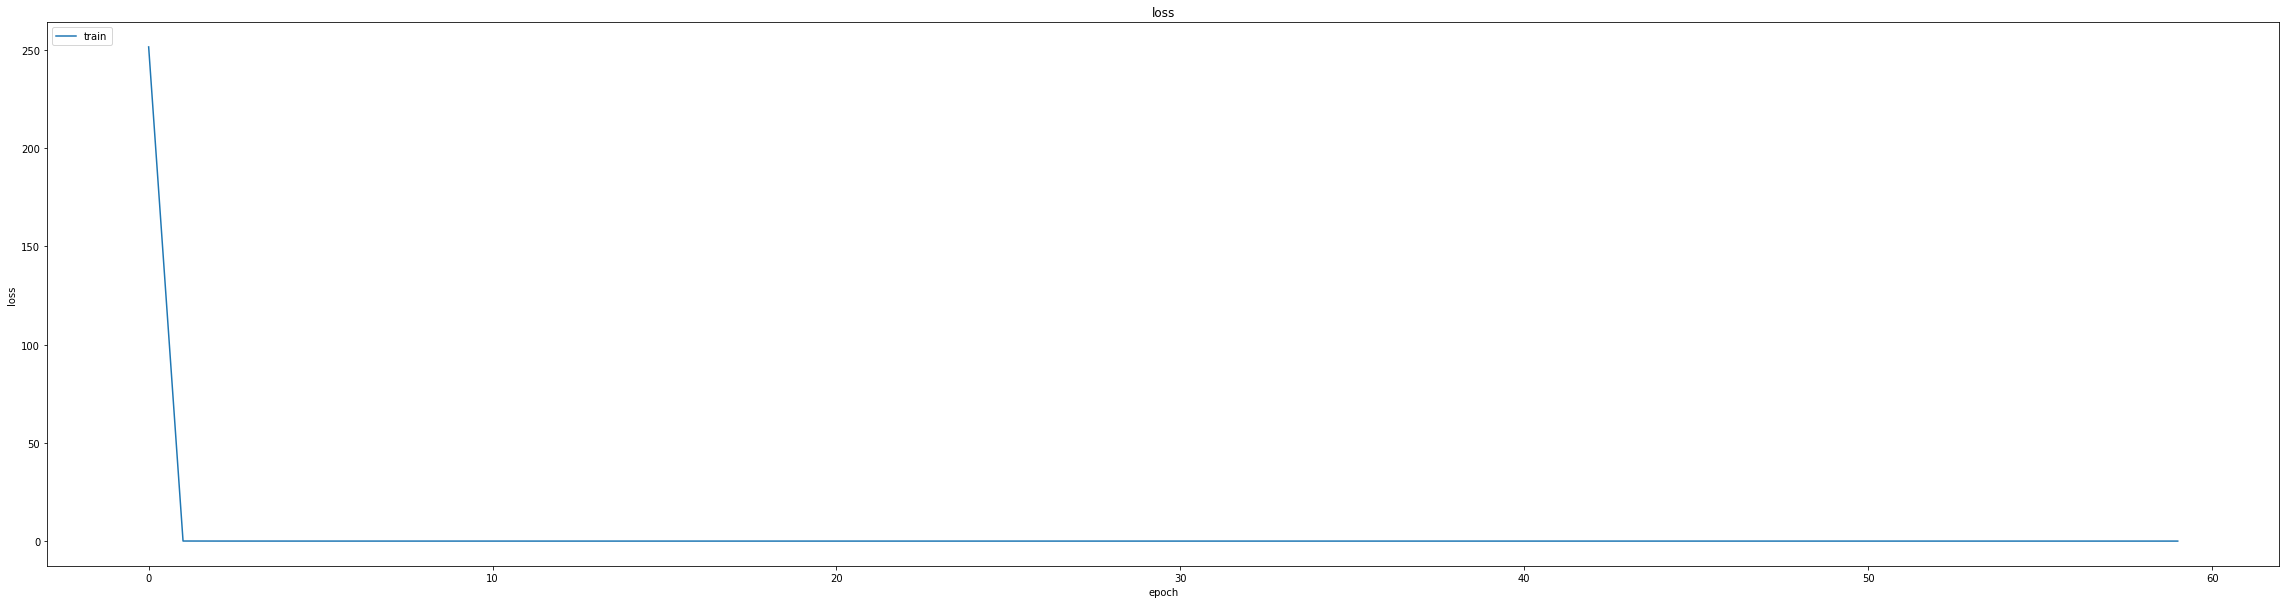

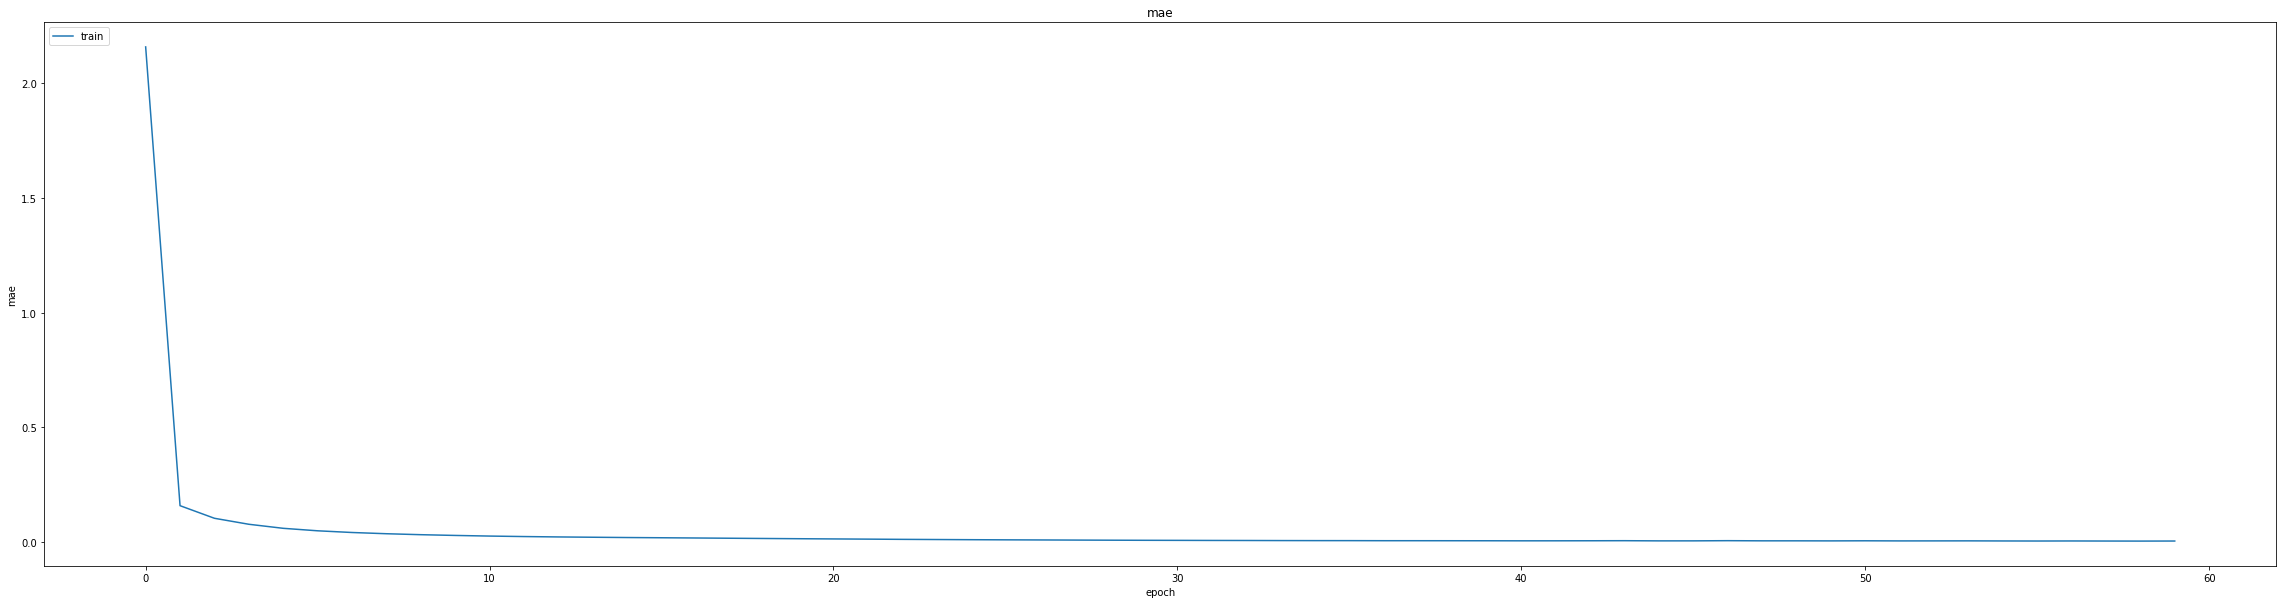

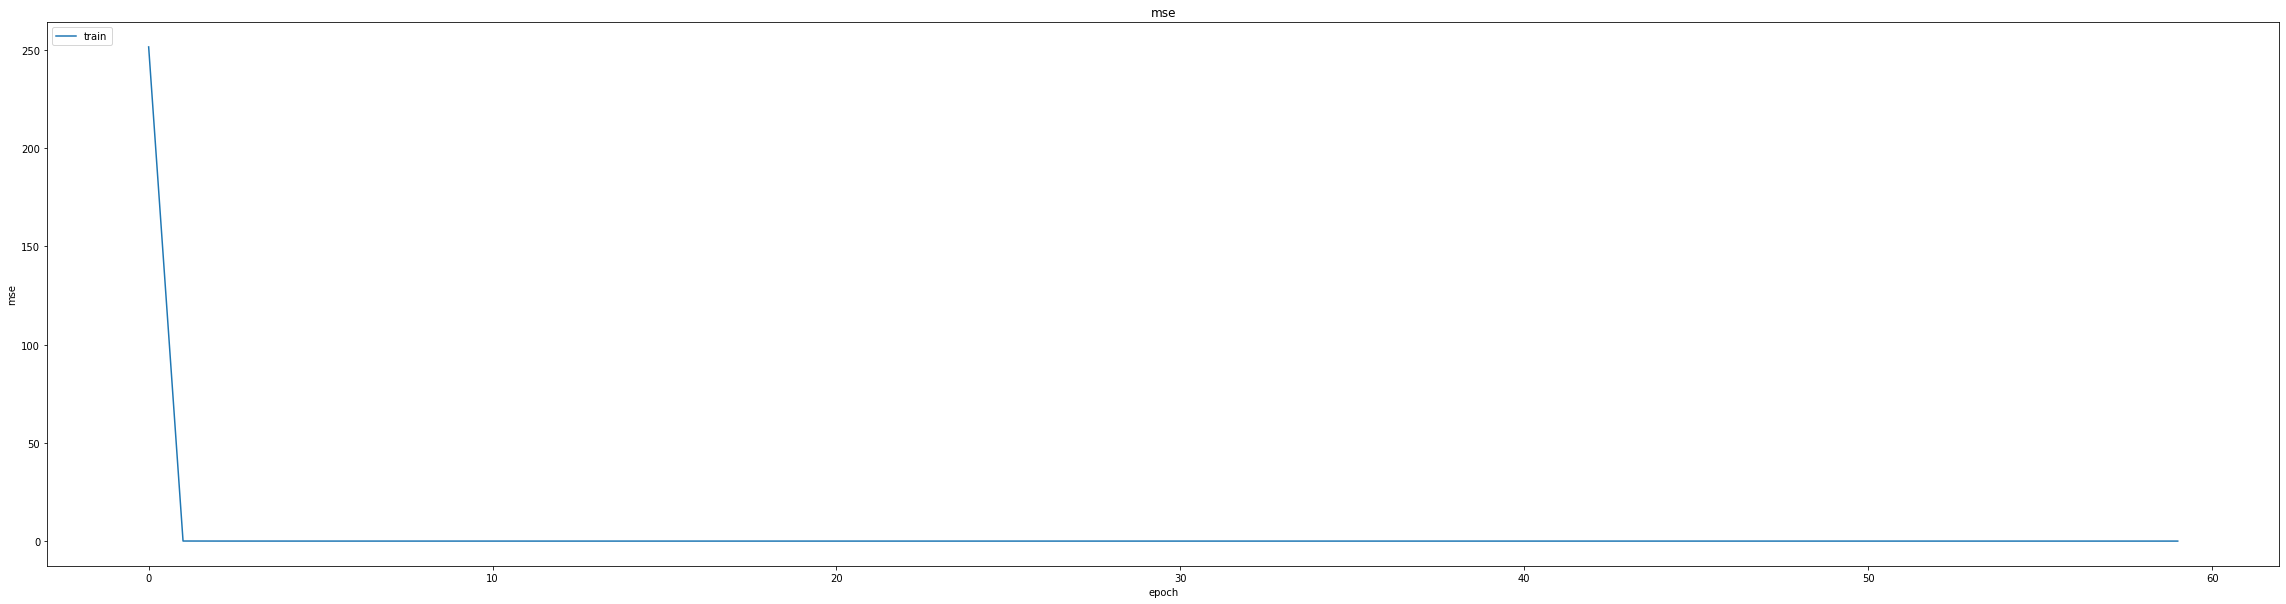

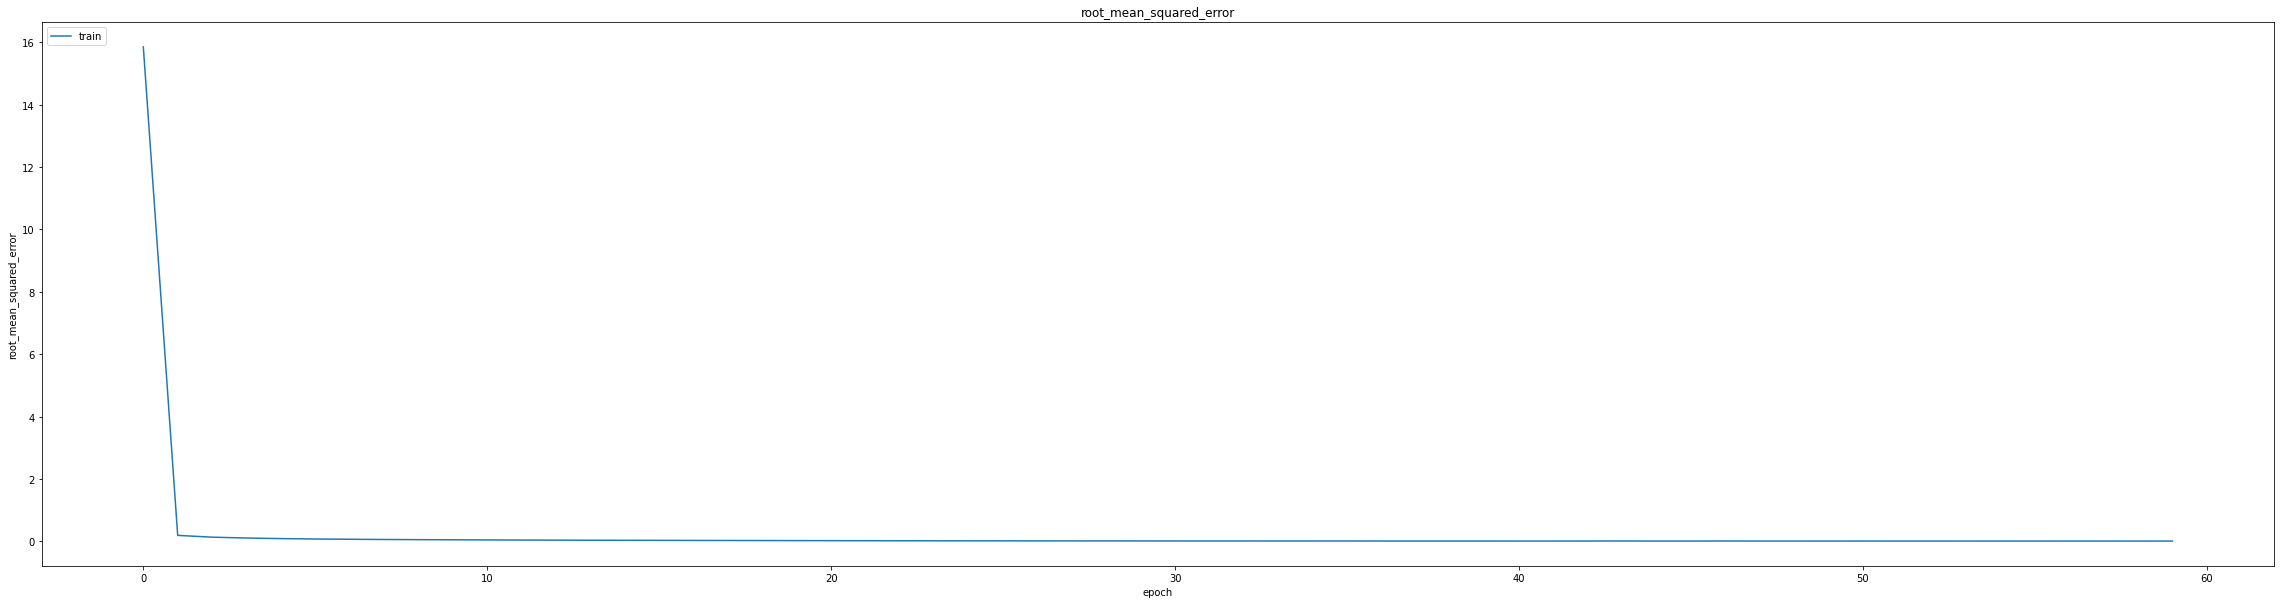

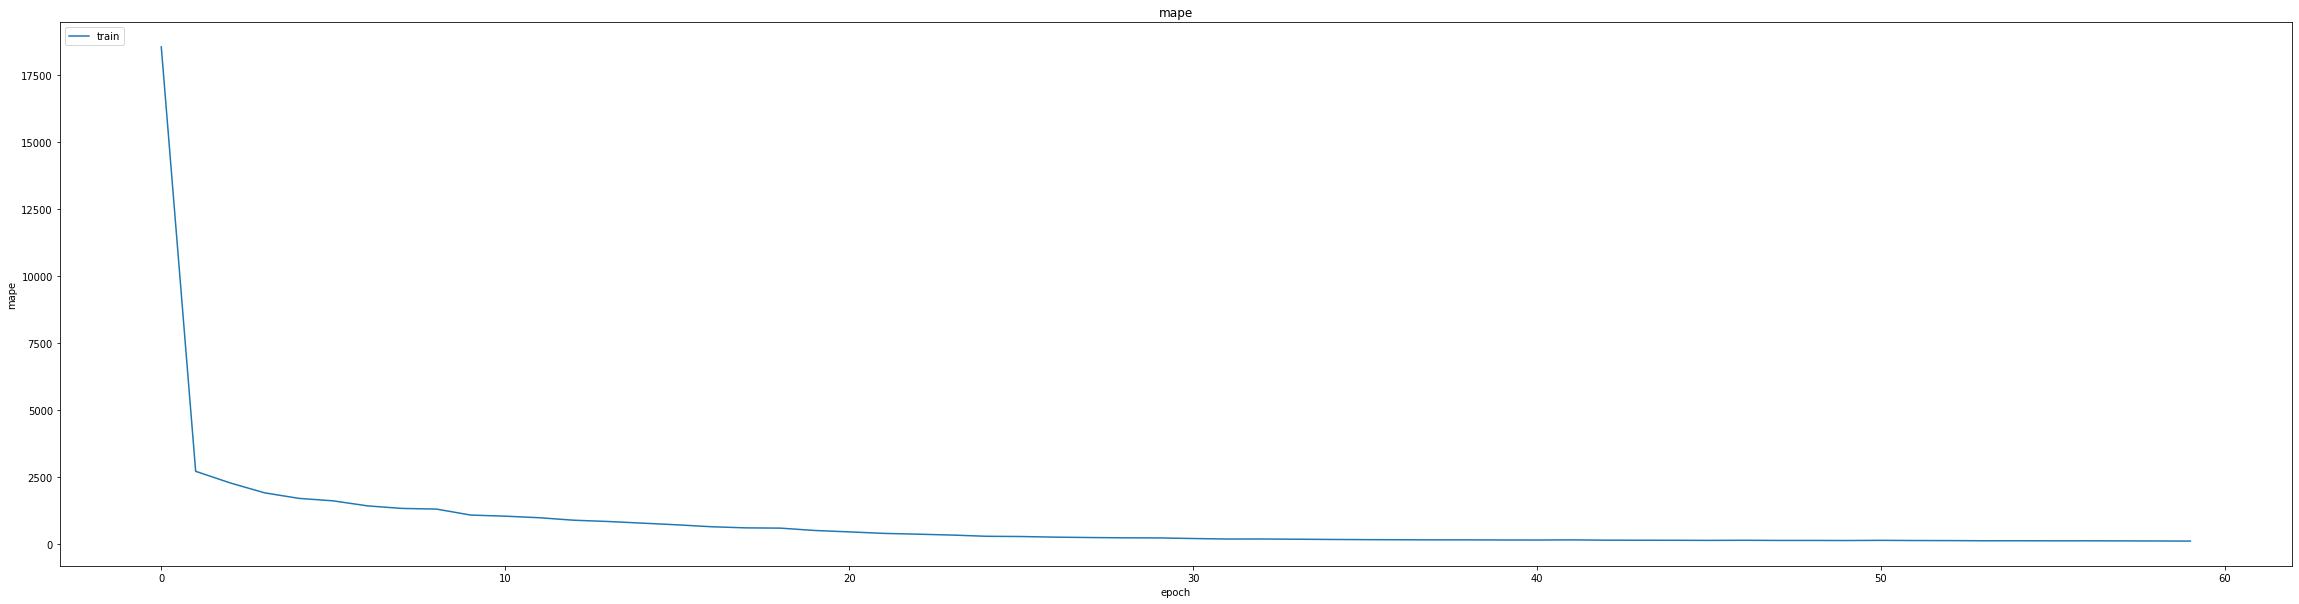

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:

print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.011075939051806927
0.01456053089350462
687/687 [==============================] - 27s 38ms/step
0.9946414267319404


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:

early_stopping = EarlyStopping(monitor='val_mse', patience=12)

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 1.3383e-04 - mae: 0.0053 - mse: 1.3383e-04 - root_mean_squared_error: 0.0116 - mape: 116.6136
Epoch 1: val_mse did not improve from 0.00021
463/463 [==============================] - 305s 650ms/step - loss: 1.3383e-04 - mae: 0.0053 - mse: 1.3383e-04 - root_mean_squared_error: 0.0116 - mape: 116.6136 - val_loss: 2.2692e-04 - val_mae: 0.0115 - val_mse: 2.2692e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 1225.2310 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 1.8783e-05 - mae: 0.0033 - mse: 1.8783e-05 - root_mean_squared_error: 0.0043 - mape: 104.4125
Epoch 2: val_mse did not improve from 0.00021
463/463 [==============================] - 294s 635ms/step - loss: 1.8783e-05 - mae: 0.0033 - mse: 1.8783e-05 - root_mean_squared_error: 0.0043 - mape: 104.4125 - val_loss: 2.2459e-04 - val_mae: 0.0115 - val_mse: 2.2459e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 1229.0808

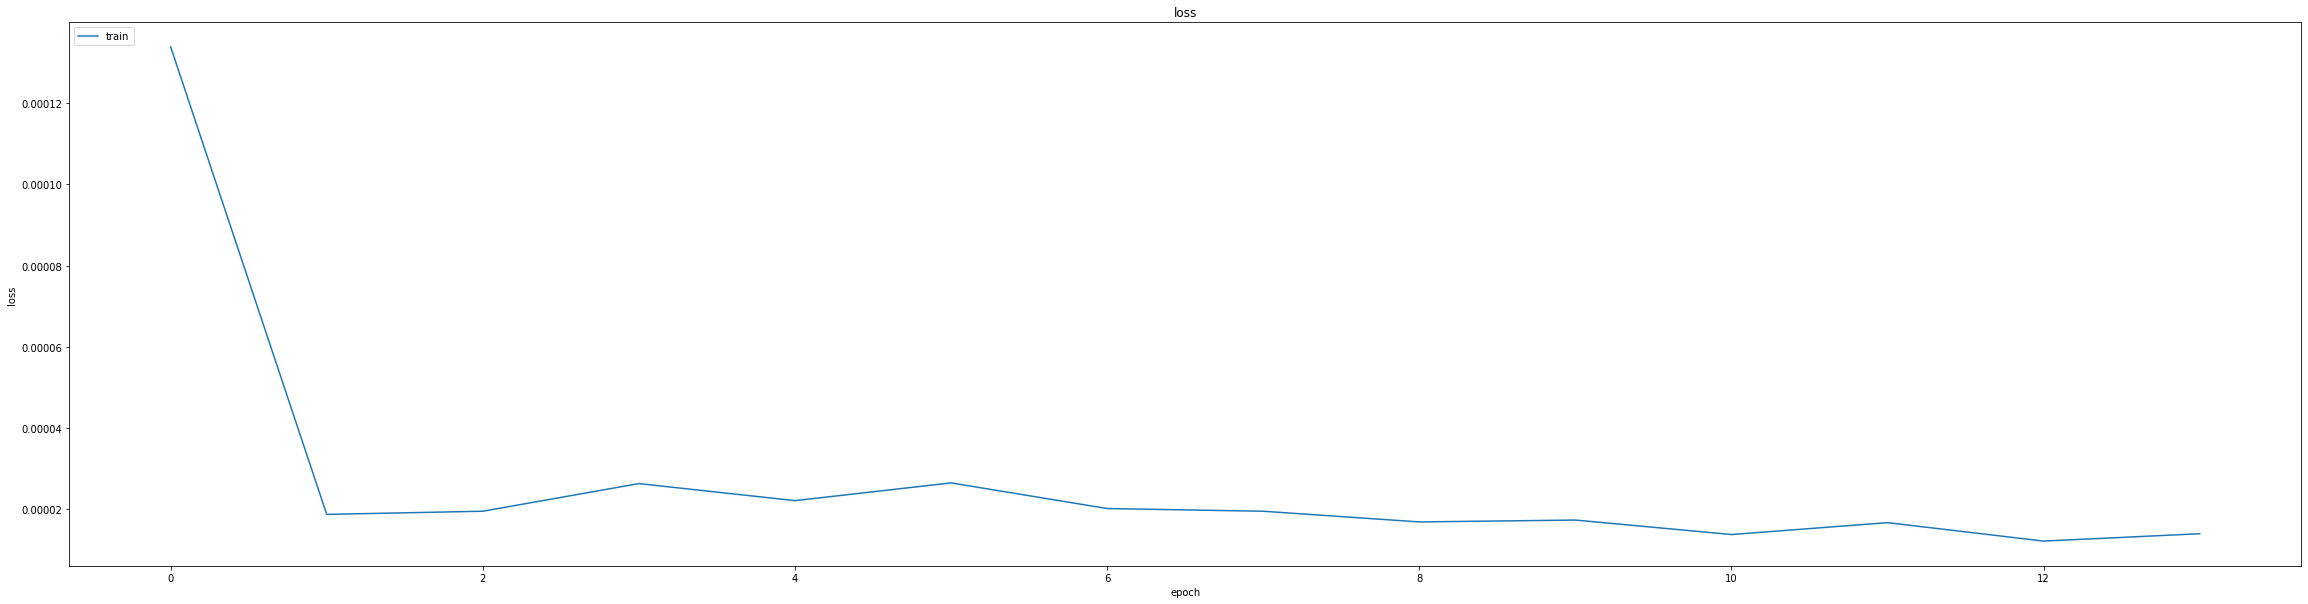

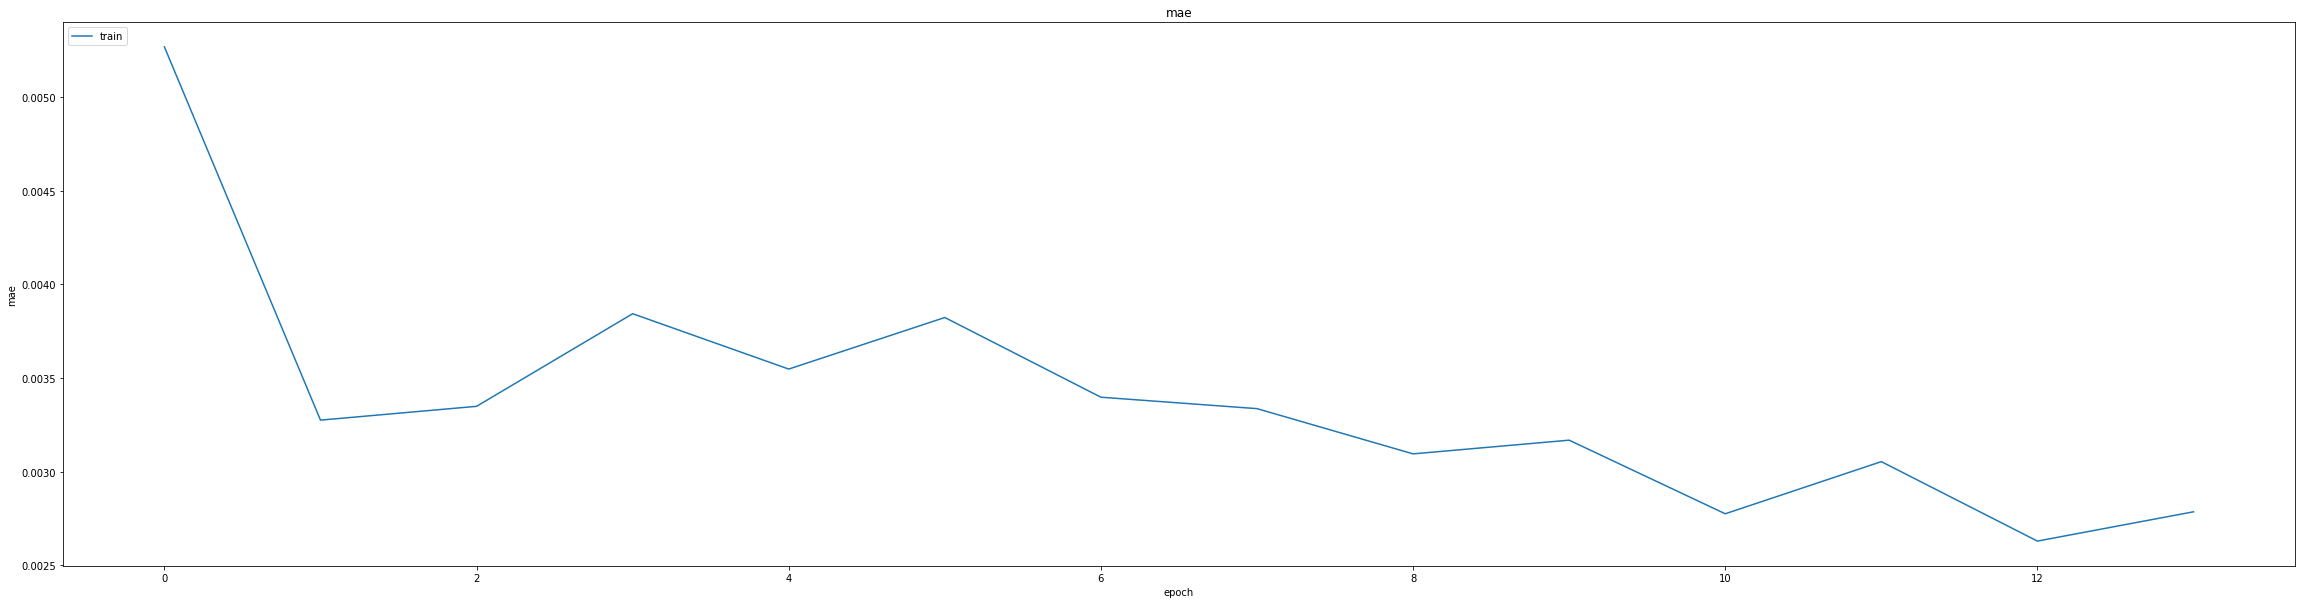

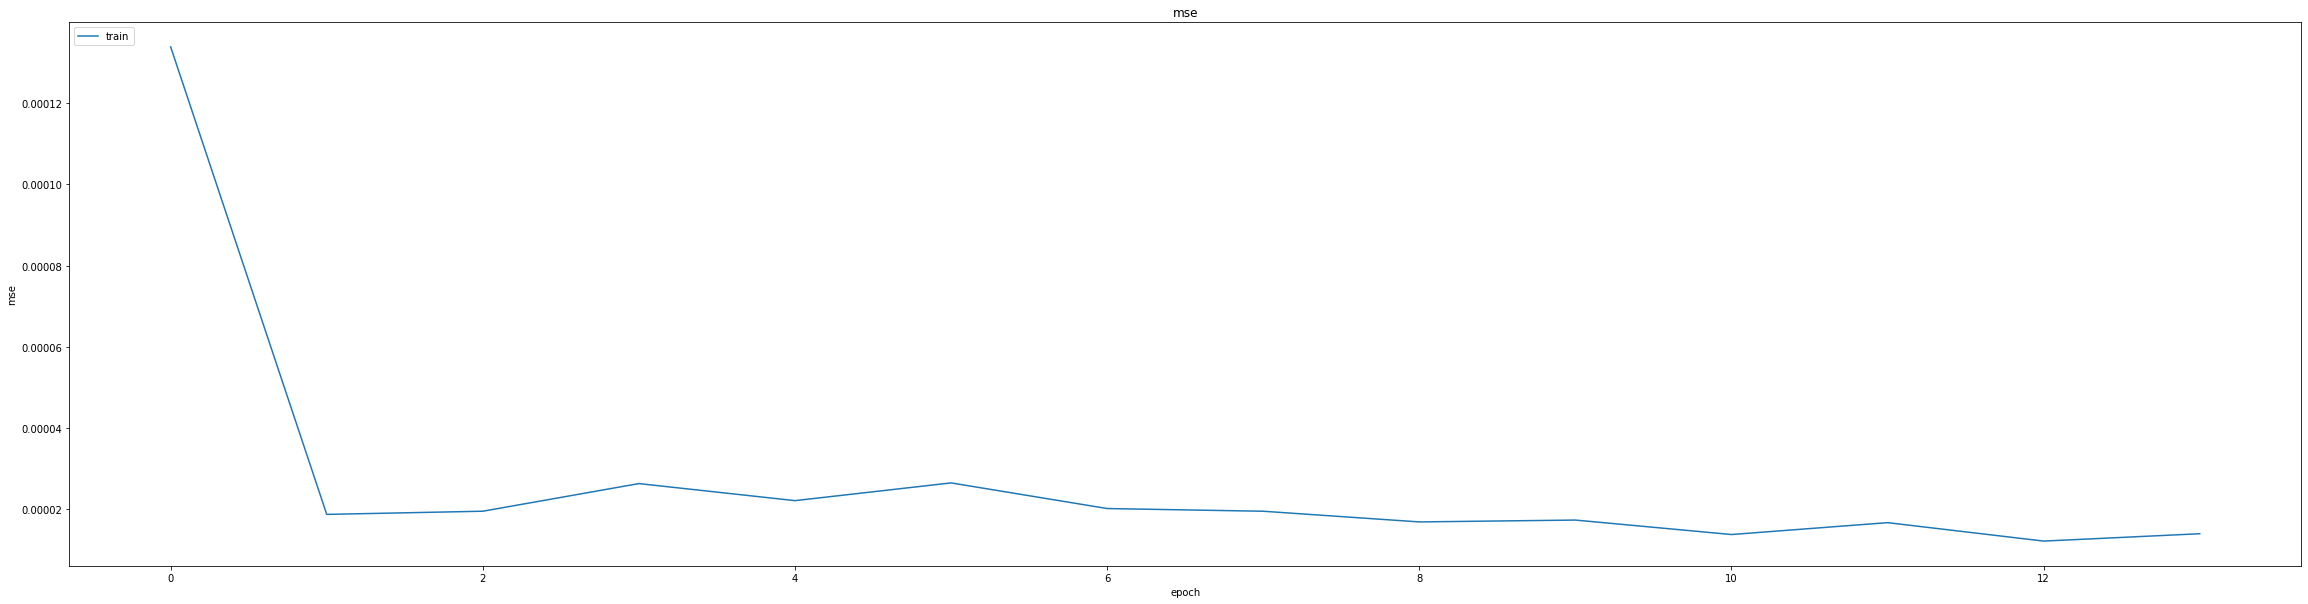

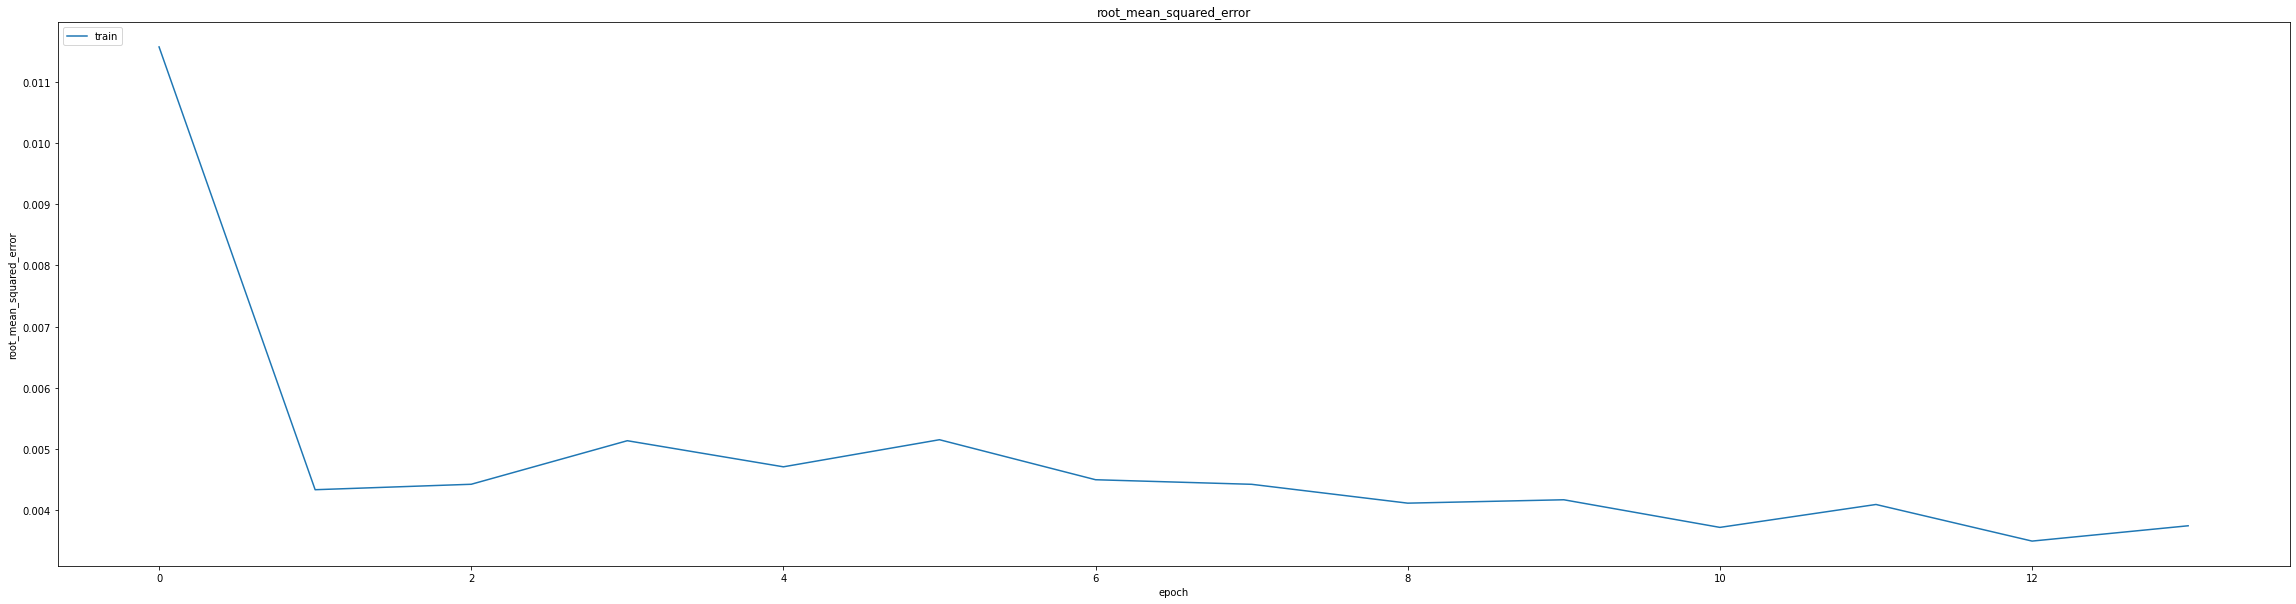

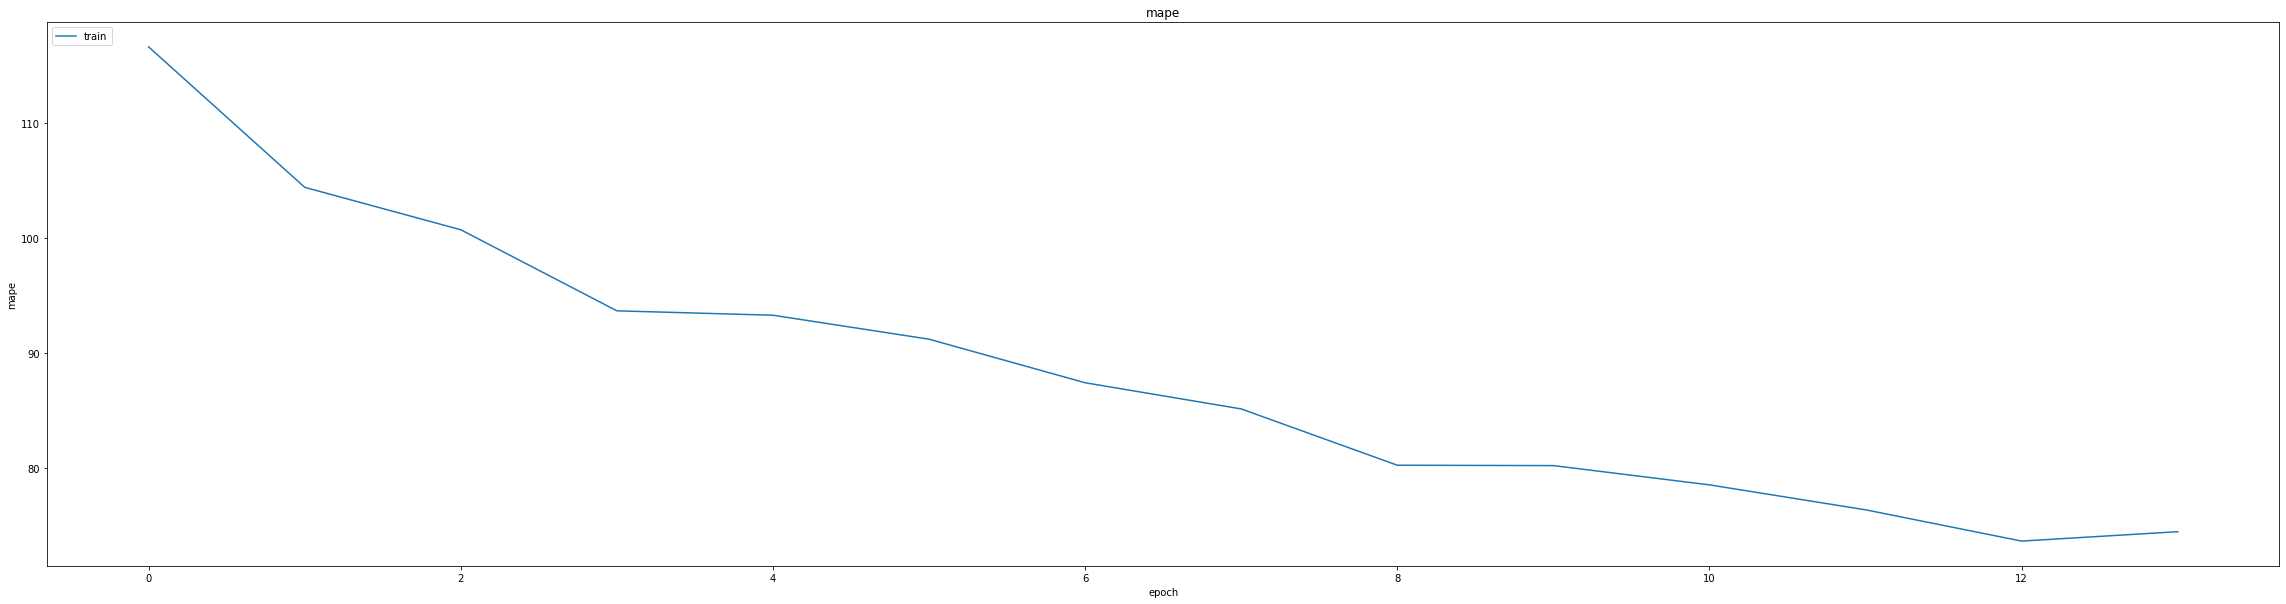

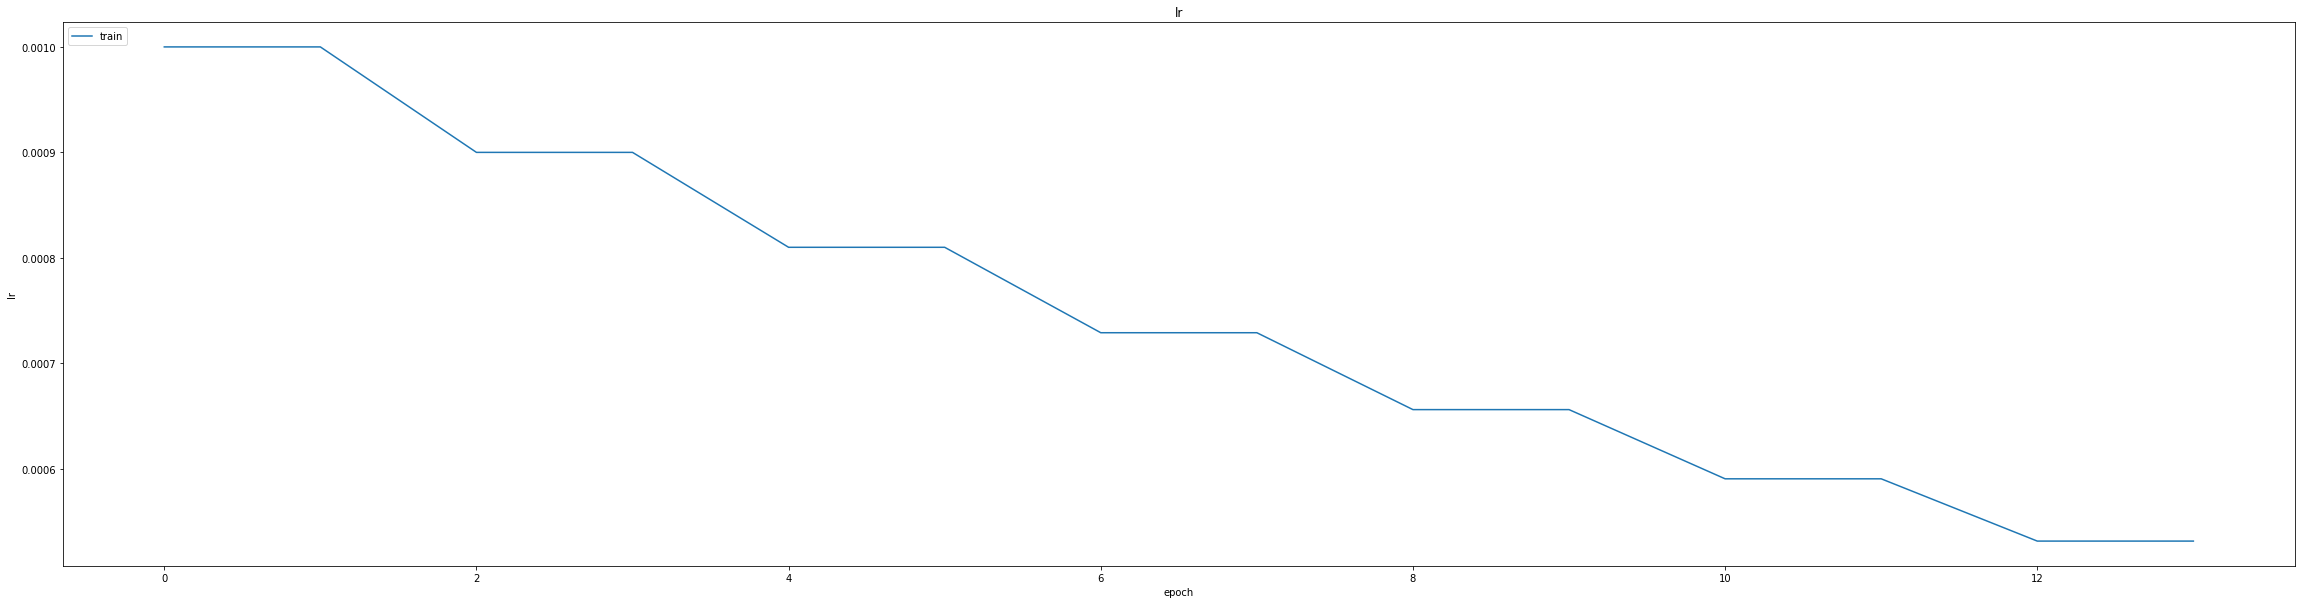

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:

print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.011484775692224503
0.014986284077167511
687/687 [==============================] - 36s 50ms/step
0.9882108311666138


In [ ]:
model.load_weights("weights.best.hdf5")

687/687 [==============================] - 26s 38ms/step


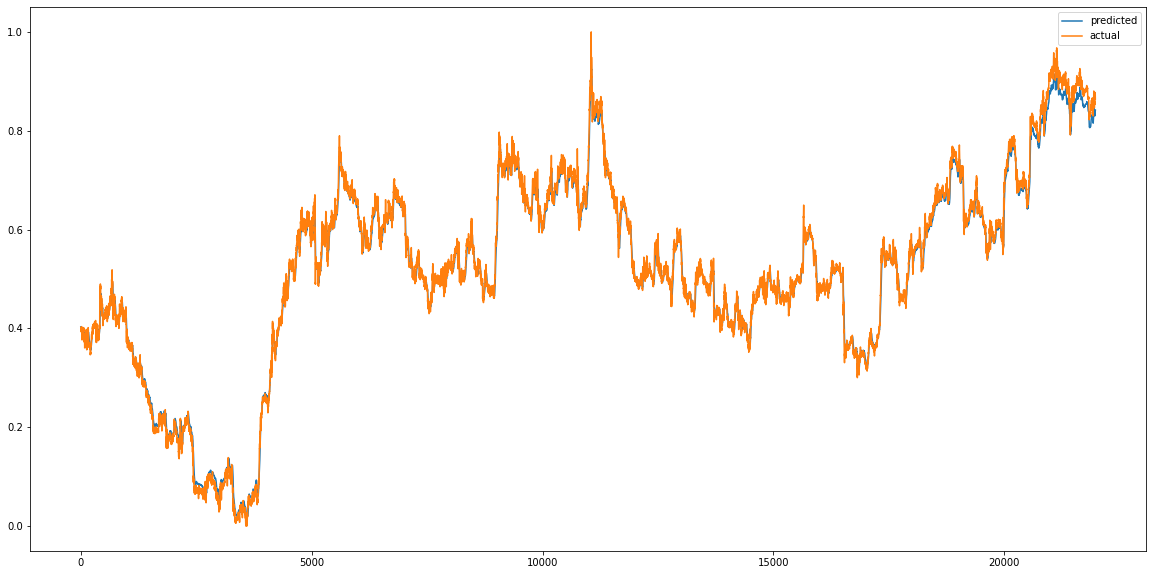

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


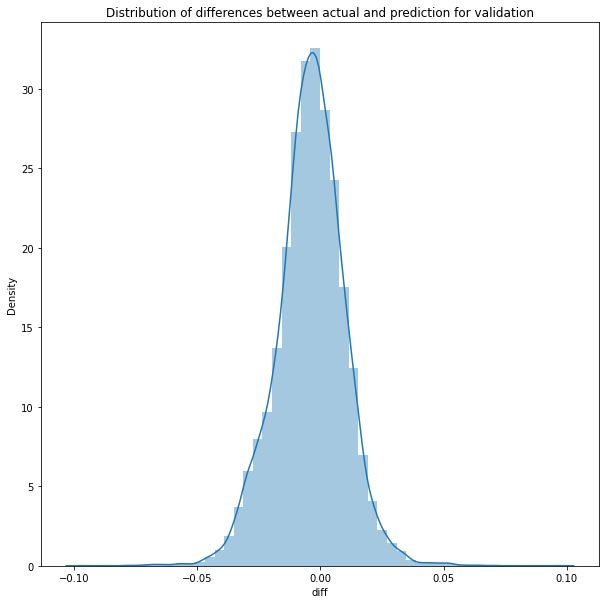

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 26s 37ms/step


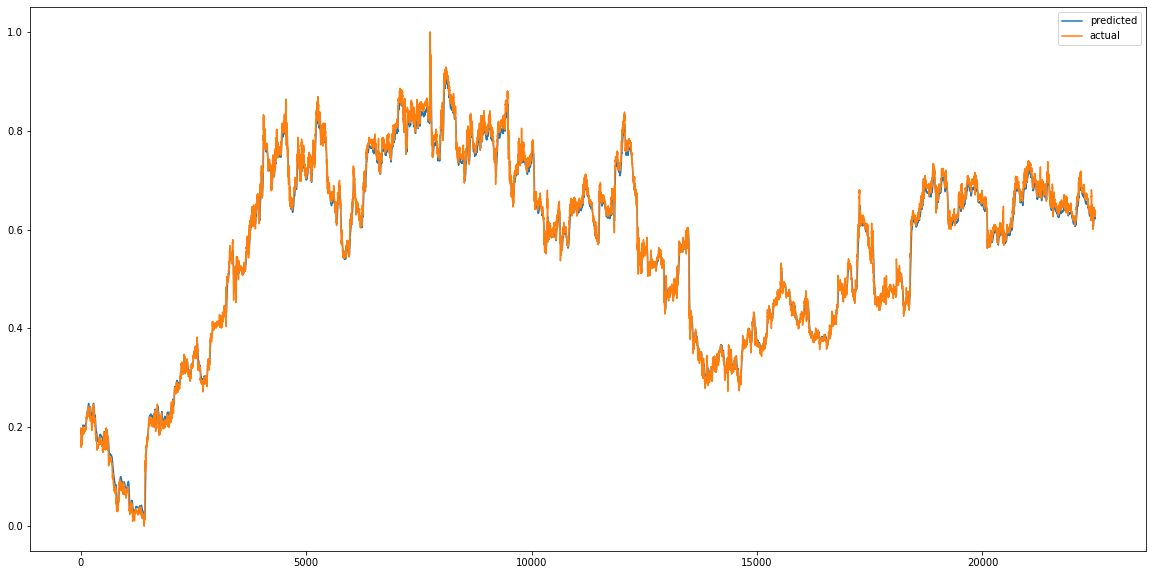

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


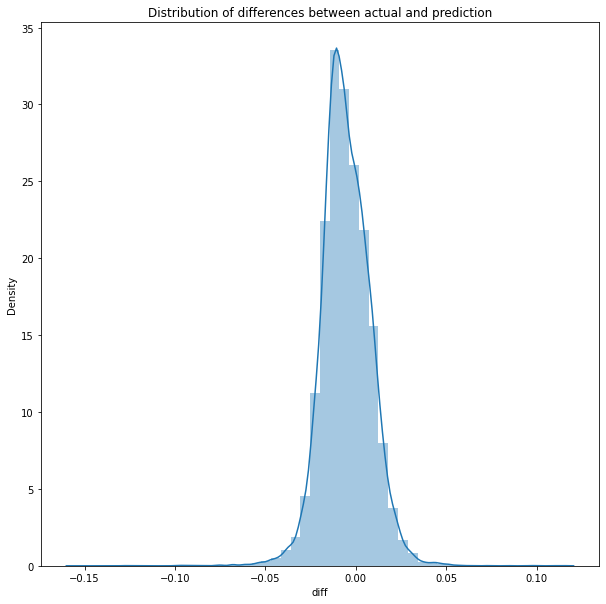

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.00020667634471360197
MAE :  0.011315633171341256
RMSE :  0.014376242371134468
704/704 [==============================] - 28s 40ms/step
R2_Score  : 0.9882108311666138


count    22505.000000
mean        -0.005361
std          0.013340
min         -0.154700
25%         -0.013723
50%         -0.006209
75%          0.003160
max          0.115063
Name: diff, dtype: float64